In [206]:
print("hello world")

hello world


**Step 1 : this is the first step of the program.**----------------------------------------------------------------

In [207]:
# import needed libraries
# Optional import to ignore warnings related to libraries
import warnings
# numpy library is needed to perform mathematical operations 
import numpy as np
# matplotlib library is needed for creating plots
import matplotlib.pyplot as plt #
# pandas library is needed for data analysis
import pandas as pd
# sklearn library is needed for machine learning
from sklearn.impute import KNNImputer
import datetime as dt

warnings.filterwarnings("ignore")


Step 2: Read the Data from CSV 
file in Visual Studio Code (VSC)----------------------------

In [208]:
# read the source file into data frame. Set SkipInitialspace=True 
#to remove extra white spaces
# https://www.geeksforgeeks.org/pandas-strip-whitespace-fromentire-dataframe/
df = pd.read_csv("10k_rows.csv", skipinitialspace=True)
# 2. check the general structure of the data frame
#df['TIME OCC'] = df['TIME OCC'].astype('object')

df.info()
# 3. check if there are any null/missing values in all the columns
# print(df.isna().sum())
# you can also check the missing values in percentages
#print(df.isnull().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           10000 non-null  int64  
 1   Date Rptd       10000 non-null  object 
 2   DATE OCC        10000 non-null  object 
 3   TIME OCC        10000 non-null  int64  
 4   AREA            10000 non-null  int64  
 5   AREA NAME       10000 non-null  object 
 6   Rpt Dist No     10000 non-null  int64  
 7   Part 1-2        10000 non-null  int64  
 8   Crm Cd          10000 non-null  int64  
 9   Crm Cd Desc     10000 non-null  object 
 10  Mocodes         9113 non-null   object 
 11  Vict Age        10000 non-null  int64  
 12  Vict Sex        9163 non-null   object 
 13  Vict Descent    9163 non-null   object 
 14  Premis Cd       10000 non-null  float64
 15  Premis Desc     9998 non-null   object 
 16  Weapon Used Cd  2371 non-null   float64
 17  Weapon Desc     2371 non-null   

Step 3: Remove unwanted features


In [209]:
import pandas as pd


# Drop the "Crm Cd 2" column
df = df.drop('Crm Cd 2', axis=1)
df = df.drop('LOCATION', axis=1)
df = df.drop('Cross Street', axis=1)
df = df.drop('AREA NAME', axis=1)
df = df.drop('Mocodes', axis=1)








Step 4: Strip before and after Whitespaces 
from entire data frame records----------------------------------------------------------------


In [210]:
print("Before stripping whitespaces:")
print(df.head())

# Store original data types
original_dtypes = df.dtypes

# Convert entire DataFrame to string type
df_str = df.astype(str)

# Apply strip to all columns, regardless of data type
df_str = df_str.apply(lambda x: x.str.strip())

# Convert columns back to their original data types
df = df_str.apply(lambda x: x.astype(original_dtypes[x.name]))

# Apply strip to all column names
df.columns = df.columns.str.strip()

print("After stripping whitespaces:")
print(df.head())




Before stripping whitespaces:
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468         01/08/2020 0:00         01/08/2020 0:00      2230     3   
1  190101086         01/02/2020 0:00         01/01/2020 0:00       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505         01/01/2020 0:00         01/01/2020 0:00      1730    15   
4  191921269         01/01/2020 0:00         01/01/2020 0:00       415    19   

   Rpt Dist No  Part 1-2  Crm Cd  \
0          377         2     624   
1          163         2     624   
2          155         2     845   
3         1543         2     745   
4         1998         2     740   

                                         Crm Cd Desc  Vict Age  ...  \
0                           BATTERY - SIMPLE ASSAULT        36  ...   
1                           BATTERY - SIMPLE ASSAULT        25  ...   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE       

Step 5: Replace unwanted values 
with nan (empty)----------------------------------------------------------------

In [211]:
# # replace values such as 'NA' OR n/a or No values with empty nan
# https://www.statology.org/pandas-replace-multiple-values/
# df = df.replace(['N/a', 'n/a', 'No', 'N\\a', 'N\a'
# , 
# 'Nill'], 
# np.nan)
# df = df.replace({'neutrophils': {',': ''
# , ', ': ''}}, regex=True)
# df = df.replace({'CRP': {'<': ''
# , '>': ''
# , '<=': ''
# , '>=': ''}}, 
# regex=True)

import numpy as np

unwanted_values = ['NA', 'n/a', 'No', 'N\\a', 'N\a', 'Nill']

# Replace unwanted values in 'Vict Descent' column with NaN
df['Vict Descent'] = df['Vict Descent'].replace(unwanted_values, np.nan)

# Replace unwanted values in 'Cross Street' column with NaN
# df['Cross Street'] = df['Cross Street'].replace(unwanted_values, np.nan)


# replace values such as 'NA' OR n/a or No values with empty nan

df['Status Desc'] = df['Status Desc'].replace(['', ' ', np.nan], np.nan)

df['Weapon Used Cd'] = df['Weapon Used Cd'].replace(['', ' ', np.nan], np.nan)

df['Vict Sex'] = df['Vict Sex'].replace(['', ' ', np.nan], np.nan)






# df.to_csv('update_cross_withNan7.csv', index=False)








Step 6: Convert Specific features 
from Object to Numeric datatype--------------------------------------------------------


In [212]:
import pandas as pd

# Convert 'Date Rptd' and 'DATE OCC' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Convert 'Weapon Used Cd' and 'Premis Cd' to integers
# First, fill missing values with 0, then convert to integers
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(0).astype('int')
df['Premis Cd'] = df['Premis Cd'].fillna(0).astype('int')
# df['Mocodes'] = df['Mocodes'].fillna(0).astype('int')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           10000 non-null  int64         
 1   Date Rptd       10000 non-null  datetime64[ns]
 2   DATE OCC        10000 non-null  datetime64[ns]
 3   TIME OCC        10000 non-null  int64         
 4   AREA            10000 non-null  int64         
 5   Rpt Dist No     10000 non-null  int64         
 6   Part 1-2        10000 non-null  int64         
 7   Crm Cd          10000 non-null  int64         
 8   Crm Cd Desc     10000 non-null  object        
 9   Vict Age        10000 non-null  int64         
 10  Vict Sex        10000 non-null  object        
 11  Vict Descent    10000 non-null  object        
 12  Premis Cd       10000 non-null  int32         
 13  Premis Desc     10000 non-null  object        
 14  Weapon Used Cd  10000 non-null  int32         
 15  Wea

Step 7: Convert Binary (Yes/No) 
feature values to 1 or 0 for ML

In [213]:
#def convert_vict_sex(value):
 #   if value == 'M':
  #      return 0
   # elif value == 'F':
    #    return 1
    #elif value == 'X':
     #   return 2
    #else:
     #   return value

# df['Vict Sex'] = df['Vict Sex'].apply(convert_vict_sex)
# print(df[['Vict Sex']].head())


step 8: Convert categorical variables 
(Gender) using LabelEncoder technique--------------------------------------------------------

In [214]:
#check unique vals of Vict Sex
unique_vals = df['Vict Sex'].unique()
print(unique_vals)

['F' 'M' 'X' 'nan' 'H']


In [215]:
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(LabelEncoder):
    def __init__(self, mapping):
        super().__init__()
        self.mapping = mapping
    
    def fit_transform(self, y):
        return [self.mapping[x] if x in self.mapping else x for x in y]

# mapping = {'M': 0, 'F': 1, 'X': 2}
# df['Vict Sex'] = df['Vict Sex'].map(mapping)

for index, row in df.iterrows():
    sex = str(row['Vict Sex'])
    if sex == 'M':
        df.at[index, 'Vict Sex'] = 0
    elif sex == 'F':
        df.at[index, 'Vict Sex'] = 1
    elif sex == 'X':
        df.at[index, 'Vict Sex'] = 2
    elif sex == 'nan':
        df.at[index, 'Vict Sex'] = 3
    elif sex == 'H':
        df.at[index, 'Vict Sex'] = 4

print(df[['Vict Sex']].head(20))
print(df['Vict Sex'].value_counts())

df.count()

print(df[['Vict Sex']].head(20))
print(df['Vict Sex'].value_counts())

df.count()
# print(df[['Vict Sex']].head())




   Vict Sex
0         1
1         0
2         2
3         1
4         2
5         1
6         0
7         2
8         0
9         2
10        0
11        0
12        0
13        2
14        1
15        1
16        1
17        1
18        0
19        0
0    4821
1    3471
2     868
3     837
4       3
Name: Vict Sex, dtype: int64
   Vict Sex
0         1
1         0
2         2
3         1
4         2
5         1
6         0
7         2
8         0
9         2
10        0
11        0
12        0
13        2
14        1
15        1
16        1
17        1
18        0
19        0
0    4821
1    3471
2     868
3     837
4       3
Name: Vict Sex, dtype: int64


DR_NO             10000
Date Rptd         10000
DATE OCC          10000
TIME OCC          10000
AREA              10000
Rpt Dist No       10000
Part 1-2          10000
Crm Cd            10000
Crm Cd Desc       10000
Vict Age          10000
Vict Sex          10000
Vict Descent      10000
Premis Cd         10000
Premis Desc       10000
Weapon Used Cd    10000
Weapon Desc       10000
Status            10000
Status Desc       10000
Crm Cd 1          10000
LAT               10000
LON               10000
dtype: int64

In [216]:
#check unique vals of Vict Sex
unique_vals = df['Premis Desc'].unique()
print(unique_vals)

['SINGLE FAMILY DWELLING' 'SIDEWALK' 'POLICE FACILITY'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'BEAUTY SUPPLY STORE'
 'NIGHT CLUB (OPEN EVENINGS ONLY)' 'DEPARTMENT STORE' 'OTHER BUSINESS'
 'STREET' 'PARKING LOT' 'HOTEL'
 "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)" 'ALLEY'
 'CONDOMINIUM/TOWNHOUSE' 'PUBLIC RESTROOM/OUTSIDE*' 'GARAGE/CARPORT'
 'MTA BUS' 'NURSING/CONVALESCENT/RETIREMENT HOME' 'MINI-MART'
 'VEHICLE, PASSENGER/TRUCK' 'OTHER STORE' 'GROUP HOME'
 'MTA - RED LINE - UNION STATION' 'RESTAURANT/FAST FOOD'
 'MTA - RED LINE - PERSHING SQUARE' 'DRUG STORE'
 'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)'
 "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS"
 'PARKING UNDERGROUND/BUILDING' 'MOTEL' 'HOSPITAL' 'DRIVEWAY' 'MARKET'
 'LA UNION STATION (NOT LINE SPECIFIC)' 'MISSIONS/SHELTERS'
 'BAR/COCKTAIL/NIGHTCLUB' 'TOW YARD*' 'DETENTION/JAIL FACILITY'
 'OTHER PREMISE' 'CELL PHONE STORE' 'CLOTHING STORE' 'BANK'
 'MTA - BLUE LINE - 7TH AND METRO CENTER' 'OTHER/OUTSIDE'
 'S

Premis Desc num vals 

In [217]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Premis Desc'] = le.fit_transform(df['Premis Desc'])
# df.to_csv('update_Premis_num_vals3.csv', index=False)



In [218]:
#check unique vals of status Desc
unique_vals = df['Vict Descent'].unique()
print(unique_vals)

['B' 'H' 'X' 'W' 'A' 'O' 'nan' 'C' 'F' 'K' 'I' 'V' 'Z' 'J' 'P']


Vict Descent

In [219]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Vict Descent' column
df['Vict Descent'] = le.fit_transform(df['Vict Descent'].astype(str))

# Print the first 20 rows to check the result
print(df[['Vict Descent']].head(20))

# Print the value counts of the 'Vict Descent' column to check the distribution
print(df['Vict Descent'].value_counts())




    Vict Descent
0              1
1              4
2             12
3             11
4             12
5              4
6              4
7             12
8              1
9             12
10             0
11             8
12             0
13            12
14             4
15             4
16             4
17            11
18             1
19             1
4     3109
11    2598
1     1215
12     953
14     837
8      811
0      290
7       53
3       44
2       36
6       20
5       16
10      12
13       4
9        2
Name: Vict Descent, dtype: int64


In [220]:
#check unique vals of status Desc
unique_vals = df['Status Desc'].unique()
print(unique_vals)

['Adult Other' 'Invest Cont' 'Adult Arrest' 'Juv Arrest' 'Juv Other']


Status Desc 

In [221]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit label encoder on the Status Desc column
le.fit(df['Status Desc'])

# Transform Status Desc column to numeric values
df['Status Desc'] = le.transform(df['Status Desc'])

# Print the transformed column and their respective value counts
print(df[['Status Desc']].head(20))
print(df['Status Desc'].value_counts())



    Status Desc
0             1
1             2
2             0
3             2
4             2
5             2
6             2
7             2
8             2
9             1
10            2
11            2
12            0
13            2
14            2
15            2
16            1
17            2
18            2
19            2
2    8641
1     731
0     599
3      25
4       4
Name: Status Desc, dtype: int64


In [222]:
#check unique vals of status 
unique_vals = df['Status'].unique()
print(unique_vals)


['AO' 'IC' 'AA' 'JA' 'JO']


status num vals

In [223]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the 'Status' column
df['Status'] = le.fit_transform(df['Status'])

print(df[['Status']].head(20))
print(df['Status'].value_counts())



    Status
0        1
1        2
2        0
3        2
4        2
5        2
6        2
7        2
8        2
9        1
10       2
11       2
12       0
13       2
14       2
15       2
16       1
17       2
18       2
19       2
2    8641
1     731
0     599
3      25
4       4
Name: Status, dtype: int64


In [224]:
#check unique vals of Weapon Desc
unique_vals = df['Weapon Desc'].unique()
print(unique_vals)

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
 'UNKNOWN WEAPON/OTHER WEAPON' 'nan' 'ROCK/THROWN OBJECT' 'VERBAL THREAT'
 'FOLDING KNIFE' 'BLUNT INSTRUMENT' 'BOTTLE' 'SEMI-AUTOMATIC PISTOL'
 'CLUB/BAT' 'OTHER CUTTING INSTRUMENT' 'HAND GUN' 'PHYSICAL PRESENCE'
 'VEHICLE' 'SCISSORS' 'STICK' 'MACHETE' 'OTHER KNIFE' 'SHOTGUN' 'ICE PICK'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIRE' 'GLASS' 'SIMULATED GUN'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'DEMAND NOTE' 'BOMB THREAT'
 'PIPE/METAL PIPE' 'UNKNOWN FIREARM' 'MACE/PEPPER SPRAY' 'HAMMER' 'RAZOR'
 'OTHER FIREARM' 'BELT FLAILING INSTRUMENT/CHAIN'
 'UNKNOWN TYPE CUTTING INSTRUMENT' 'SCREWDRIVER' 'KITCHEN KNIFE'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'BRASS KNUCKLES' 'REVOLVER'
 'SWITCH BLADE' 'STUN GUN' 'AXE' 'RIFLE' 'ASSAULT WEAPON/UZI/AK47/ETC'
 'ANTIQUE FIREARM' 'FIXED OBJECT' 'SEMI-AUTOMATIC RIFLE'
 'CAUSTIC CHEMICAL/POISON' 'TIRE IRON' 'MARTIAL ARTS WEAPONS']


Weapon Desc num vals

In [225]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Weapon Desc'] = le.fit_transform(df['Weapon Desc'])

print(df[['Weapon Desc']].head(20))
print(df['Weapon Desc'].value_counts())
# df.to_csv('update_desc_num_vals5.csv', index=False)




    Weapon Desc
0            41
1            47
2            50
3            50
4            50
5            47
6            50
7            50
8            50
9            50
10           33
11           49
12           50
13           47
14           50
15           41
16           41
17           41
18           50
19           14
50    7629
41    1305
47     308
49     173
17     106
27      49
20      48
45      34
7       26
36      26
22      25
33      19
40      18
29      17
5       16
14      13
19      12
25      12
46      11
31      11
39      11
21      11
48      11
0       11
10      10
23       9
12       9
35       7
28       7
34       6
16       5
3        4
26       4
4        4
32       4
43       3
13       3
11       3
6        3
38       3
8        2
37       2
9        2
30       1
42       1
15       1
18       1
2        1
1        1
44       1
24       1
Name: Weapon Desc, dtype: int64


In [226]:
#check unique vals of 
unique_vals = df['Crm Cd Desc'].unique()
print(unique_vals)

['BATTERY - SIMPLE ASSAULT' 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'RAPE, FORCIBLE' 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 'OTHER MISCELLANEOUS CRIME'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'BURGLARY FROM VEHICLE' 'CRIMINAL THREATS - NO WEAPON DISPLAYED' 'ARSON'
 'INTIMATE PARTNER - SIMPLE ASSAULT' 'THEFT PLAIN - PETTY ($950 & UNDER)'
 'THEFT OF IDENTITY' 'ROBBERY'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'BURGLARY'
 'VEHICLE - STOLEN' 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
 'BRANDISH WEAPON' 'INTIMATE PARTNER - AGGRAVATED ASSAULT'
 'BUNCO, GRAND THEFT' 'THEFT, PERSON' 'BATTERY WITH SEXUAL CONTACT'
 'BIKE - STOLEN' 'BATTERY POLICE (SIMPLE)'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' 'VIOLATION OF COURT ORDER'
 'TRESPASSING' 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)'
 'VIOLATION OF RESTRAINING ORDER' 'DISTURBING THE PEACE'

Crm Cd Desc num vals

In [227]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crm Cd Desc'] = le.fit_transform(df['Crm Cd Desc'])
print(df[['Crm Cd Desc']].head(20))
print(df['Crm Cd Desc'].value_counts())




    Crm Cd Desc
0             4
1             4
2            67
3            93
4            92
5            64
6            71
7            57
8            85
9            85
10           15
11           28
12           85
13            0
14           71
15           49
16           49
17           83
18           81
19           66
78    3096
95     681
4      622
15     539
83     455
      ... 
45       1
33       1
36       1
26       1
37       1
Name: Crm Cd Desc, Length: 99, dtype: int64


In [228]:
#check unique vals of 
unique_vals = df['Weapon Used Cd'].unique()
print(unique_vals)

[400 500   0 306 511 204 302 212 109 304 218 102 515 307 216 308 215 207
 104 214 200 506 221 113 201 504 501 312 106 512 311 208 107 301 223 219
 205 114 303 101 206 513 211 103 115 116 305 110 503 514 508]


In [229]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Weapon Used Cd'] = le.fit_transform(df['Weapon Used Cd'])
print(df[['Weapon Used Cd']].head(20))
print(df['Weapon Used Cd'].value_counts())


    Weapon Used Cd
0               39
1               40
2                0
3                0
4                0
5               40
6                0
7                0
8                0
9                0
10              34
11              46
12               0
13              40
14               0
15              39
16              39
17              39
18               0
19              15
0     7629
39    1305
40     308
46     173
2      106
18      49
13      48
5       34
21      26
7       26
47      25
34      19
36      18
38      17
30      16
15      13
16      12
25      12
28      11
1       11
9       11
14      11
35      11
10      11
32      10
23       9
44       9
26       7
50       7
24       6
37       5
20       4
6        4
29       4
3        4
17       3
33       3
43       3
41       3
4        3
31       2
8        2
42       2
19       1
48       1
27       1
22       1
11       1
12       1
49       1
45       1
Name: Weapon Used Cd, dtype: int64


Step 9: Convert any exceptional 
cases with proper numeric values


In [230]:

# # since "type of operation" has just one type and too many typos, we convert it as fixed 1
# #df.info()
# # df.iloc[:, 26] = 1 # 26 is the index of the type of operation column

# import numpy as np

# # Calculate the 1st and 3rd quartiles of the 'TIME OCC' column
# q1 = df['TIME OCC'].quantile(0.25)
# q3 = df['TIME OCC'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# iqr = q3 - q1

# # Define the lower and upper bounds for outliers
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Replace outliers with the median value of the 'TIME OCC' column
# median_time_occ = df['TIME OCC'].median()
# df['TIME OCC'] = np.where(
#     (df['TIME OCC'] < lower_bound) | (df['TIME OCC'] > upper_bound),
#     median_time_occ,
#     df['TIME OCC']
# )






Step 10: Convert Text data features 
into categories

In [231]:

# # Camorbidities categorites into binary yes (1) or no (0).
# # we can write in lambda expression or as simple function.
# for index, row in df.iterrows():
# if str(row['comorbidities']).strip == 'no' or
# pd.isna(row['comorbidities']):
# df['comorbidities'].at[index] = 0
# else:
# df['comorbidities'].at[index] = 1
# # we need to convert the feature as int for machine earning 
# df['comorbidities'] = df['comorbidities'].astype('int')
# # double check the properties of the column
# print(df['comorbidities'].info())


Step 10: Convert Text data features 
into categories v2

In [232]:
# '''''
# # classify pathology categories into different categories.
# for index, row in df.iterrows():
# if 'early appendicitis' in str(row['pathology']).lower(): #early stage
# df['pathology'].at[index] = 'EAP'
# elif 'acute appendicitis' in str(row['pathology']).lower(): #late stage
# df['pathology'].at[index] = 'ACP'
# elif 'suppurative appendicitis' in str(row['pathology']).lower(): # severe stage
# df['pathology'].at[index] = 'SUP'
# elif 'follicular' in str(row['pathology']).lower(): # rare stage
# df['pathology'].at[index] = 'FOL'
# elif 'reactive' in str(row['pathology']).lower(): # spread at damaged tissues
# df['pathology'].at[index] = 'REA'
# else:
# df['pathology'].at[index] = 'OTH'
# # we need to convert the feature as category
# df['pathology'] = df['pathology'].astype('category')
# print(df['pathology'].unique())

convert vict sex to numeric 

In [233]:
import pandas as pd
df['Vict Sex'] = df['Vict Sex'].fillna(0).astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           10000 non-null  int64         
 1   Date Rptd       10000 non-null  datetime64[ns]
 2   DATE OCC        10000 non-null  datetime64[ns]
 3   TIME OCC        10000 non-null  int64         
 4   AREA            10000 non-null  int64         
 5   Rpt Dist No     10000 non-null  int64         
 6   Part 1-2        10000 non-null  int64         
 7   Crm Cd          10000 non-null  int64         
 8   Crm Cd Desc     10000 non-null  int32         
 9   Vict Age        10000 non-null  int64         
 10  Vict Sex        10000 non-null  int32         
 11  Vict Descent    10000 non-null  int32         
 12  Premis Cd       10000 non-null  int32         
 13  Premis Desc     10000 non-null  int32         
 14  Weapon Used Cd  10000 non-null  int64         
 15  Wea

Step 12: Apply KNNImputer imputation 
technique to fill missing values--------------------------------

In [234]:
import pandas as pd
from sklearn.impute import KNNImputer

# List the columns you want to impute missing values for
impute_col_names = ['TIME OCC', 'Weapon Used Cd']

# Create an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # 5 is the default value

# Apply the imputer to the selected columns
df_KNN_imputed = imputer.fit_transform(df[impute_col_names])

# Create a new DataFrame with the imputed values
df_KNN_imputed = pd.DataFrame(df_KNN_imputed, columns=impute_col_names)

# Update the original DataFrame with the imputed values
df[impute_col_names] = df_KNN_imputed

# Check the updated DataFrame
print(df[['TIME OCC', 'Weapon Used Cd']].head())



   TIME OCC  Weapon Used Cd
0    2230.0            39.0
1     330.0            40.0
2    1200.0             0.0
3    1730.0             0.0
4     415.0             0.0


Step 13: Apply rounding function to avoid 
any decimal values for Yes/No features

In [235]:
# # 13. Apply imputation on all the columns having binary Yes/No type 
# values
# # #https://towardsdatascience.com/preprocessing-encode-and-knnimpute-all-categorical-features-fast-b05f50b4dfaa
# df_clean = 
# pd.DataFrame(np.round(imputer.fit_transform(df_KNN_clean)),columns
# = df_KNN_clean.columns)


Step 14: View/Export the results into 
new CSV file to check scaled data

In [236]:
# export to see the transformed data
# 
# you can check by viewing head/tail of df or export the df to a file to view the results before analysis
#df_clean.head()

Step 15: Split the data based on features 
(independent and dependent/target variable)--

In [237]:
# # split the dataset based on dependent (target class) and 
x = df.drop('Vict Sex', axis=1)
y = df['Vict Sex']
# Print the shape of x and y
print("x shape:", x.shape)
print("y shape:", y.shape)

# Print the first few rows of x and y
print("\nFirst few rows of x:")
print(x.head())
print("\nFirst few rows of y:")
print(y.head())





x shape: (10000, 20)
y shape: (10000,)

First few rows of x:
       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA  Rpt Dist No  Part 1-2  \
0   10304468 2020-01-08 2020-01-08    2230.0     3          377         2   
1  190101086 2020-01-02 2020-01-01     330.0     1          163         2   
2  200110444 2020-04-14 2020-02-13    1200.0     1          155         2   
3  191501505 2020-01-01 2020-01-01    1730.0    15         1543         2   
4  191921269 2020-01-01 2020-01-01     415.0    19         1998         2   

   Crm Cd  Crm Cd Desc  Vict Age  Vict Descent  Premis Cd  Premis Desc  \
0     624            4        36             1        501          146   
1     624            4        25             4        102          145   
2     845           67         0            12        726          132   
3     745           93        76            11        502          111   
4     740           92        31            12        409           16   

   Weapon Used Cd  Weapon Desc 

Convert date columns to numeric values:--------------------------------------------------------


In [238]:
x['Date Rptd_year'] = x['Date Rptd'].dt.year
x['Date Rptd_month'] = x['Date Rptd'].dt.month
x['Date Rptd_day'] = x['Date Rptd'].dt.day

x['DATE OCC_year'] = x['DATE OCC'].dt.year
x['DATE OCC_month'] = x['DATE OCC'].dt.month
x['DATE OCC_day'] = x['DATE OCC'].dt.day

x = x.drop(['Date Rptd', 'DATE OCC'], axis=1)


Encode categorical columns:------------------------


In [239]:
# categorical_columns = ['AREA NAME', 'Crm Cd Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'Cross Street', 'Mocodes', 'Premis Desc']

# x = pd.get_dummies(x, columns=categorical_columns, drop_first=True)


Apply the MinMaxScaler:-----------------------------------------------------------


In [240]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_columns = x.columns
# x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x_columns)
# x_scaled.head()
# print(x_scaled.min())
# print(x_scaled.max())


# #df.to_csv('updatev9.csv', index=False)

# # add target variable column back to preprocessed data
# #x['Vict Sex'] = y

# # export preprocessed data with target variable included
# #x.to_csv('preprocessed_data.csv', index=False)
# x_scaled['Vict Sex'] = y
# #x_scaled.to_csv('updatev12.csv', index=False)





In [241]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = [col for col in x.columns if col != 'Vict Age']
x_scaled = pd.DataFrame(scaler.fit_transform(x[columns_to_scale]), columns=columns_to_scale)
x_scaled['Vict Age'] = x['Vict Age']
x_scaled['Vict Sex'] = y # return here 
x_scaled.to_csv('scaled_data_age.csv', index=False)


Step 16: Scale the features using the 
MINMAX Scalar technique 
(all values between 0 to 1) did that above.

In [242]:
# # scale the features using the mixmax scaler (all values between 0 
# and 1)
# # There are different ways to scale the features.
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # Holding columns in a temp holder x_columns for testing purpose only
# x_columns = x.columns
# x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x_columns)
# x_scaled.head()

Step 17: Merge all the independent variables 
(cleaned independent features + 
new features from categorical variable) + 
dependent (target) variable + Export to check 
the data.

In [243]:
# x_scaled = x_scaled.join(enc_data)
# x_scaled = x_scaled.join(y)
# # export the df to a file to view the results before splitting
# x_scaled.to_csv('Lab2ClinicalDataScaled.csv', index=False)
# print(x_scaled.info())
# print('data is scaled')

Step 18: Split the data into training set 
and the test set.

In [244]:
# Splitting the dataset into the Training set (80%) and Test set (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
test_size = 0.2, random_state = 1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


         DR_NO  TIME OCC  AREA  Rpt Dist No  Part 1-2    Crm Cd  Crm Cd Desc  \
2694  0.897055  0.979220  0.10     0.140744       1.0  0.607565     0.040816   
5140  0.996239  0.296438  0.60     0.587786       1.0  0.288416     0.826531   
2568  0.897054  0.466073  0.10     0.097328       1.0  0.607565     0.040816   
3671  0.897524  0.902884  0.15     0.180344       0.0  0.472813     0.969388   
7427  0.902314  0.911366  0.65     0.655057       0.0  0.261229     0.795918   
...        ...       ...   ...          ...       ...       ...          ...   
2895  0.897057  0.720526  0.10     0.112595       1.0  0.744681     0.938776   
7813  0.896196  0.487277  0.00     0.027672       0.0  0.260047     0.153061   
905   0.896116  0.938931  0.00     0.024809       1.0  0.607565     0.040816   
5192  0.902297  0.932570  0.65     0.661260       0.0  0.261229     0.795918   
235   0.896110  0.818066  0.00     0.012882       0.0  0.390071     0.846939   

      Vict Descent  Premis Cd  Premis D

Step 19: Check if the training data is 
imbalanced


<Axes: xlabel='Vict Sex', ylabel='count'>

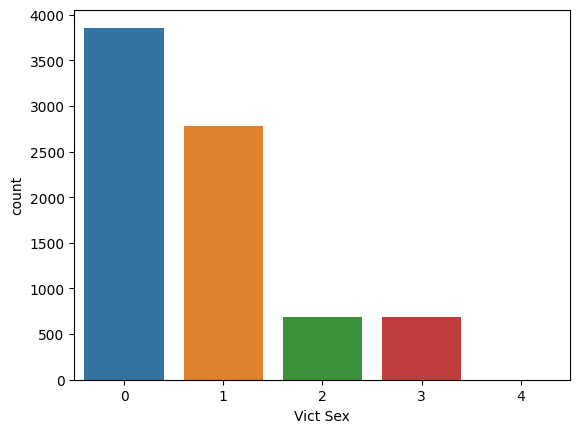

In [245]:
import seaborn as sns
x_train['Vict Sex'].value_counts()
#Note: An imbalance data could lead to inaccurate results in ML. Hence, minority results should be balanced
#using techniques such as SMOTE (next step).
sns.countplot(x='Vict Sex', 
data=x_train)


Step 20: Balance the training data using
SMOTE technique


In [246]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Shape of x_train after SMOTE:", x_train_smote.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)
print("Class distribution after SMOTE:")
print("Number of samples in class 0:", sum(y_train_smote == 0))
print("Number of samples in class 1:", sum(y_train_smote == 1))
print("Number of samples in class 2:", sum(y_train_smote == 2))
print("Number of samples in class 3:", sum(y_train_smote == 3))
print("Number of samples in class 4:", sum(y_train_smote == 4))
x_scaled.to_csv('updatev155.csv', index=False)



Shape of x_train after SMOTE: (19285, 25)
Shape of y_train after SMOTE: (19285,)
Class distribution after SMOTE:
Number of samples in class 0: 3857
Number of samples in class 1: 3857
Number of samples in class 2: 3857
Number of samples in class 3: 3857
Number of samples in class 4: 3857


# handling outliers 

Step 1: Import the needed libraries


In [247]:
#import the needed libraries
# numpy library is needed to perform mathematical operations
import matplotlib.pyplot as plt
# pandas library is needed for data analysis
import pandas as pd
# seaborn library is needed for visualizing data
import seaborn as sns


Step 2: Read the CSV file data into 
dataframe


In [248]:
df=pd.read_csv("updatev155.csv")


Step 3: View the general statistical 
analysis data of each feature

In [249]:
# Step 3: view the general statistics of the dataframe
df=pd.read_csv("updatev155.csv")
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Descent,Premis Cd,Premis Desc,...,LAT,LON,Date Rptd_year,Date Rptd_month,Date Rptd_day,DATE OCC_year,DATE OCC_month,DATE OCC_day,Vict Age,Vict Sex
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.901181,0.578578,0.283885,0.292434,0.296200,0.414691,0.625173,0.520257,0.181424,0.706195,...,0.990545,0.004138,0.022400,0.307927,0.486823,0.0,0.307791,0.475753,32.73220,0.773000
std,0.016338,0.275015,0.256935,0.245089,0.456603,0.231667,0.323814,0.314862,0.245610,0.215625,...,0.035891,0.035940,0.128841,0.342848,0.304242,0.0,0.342754,0.306431,21.09799,0.924639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.00000,0.000000
25%,0.897054,0.393978,0.100000,0.104008,0.000000,0.261229,0.306122,0.285714,0.000000,0.620112,...,0.991260,0.002439,0.000000,0.000000,0.200000,0.0,0.000000,0.200000,21.00000,0.000000
50%,0.898021,0.635708,0.200000,0.209924,0.000000,0.273050,0.795918,0.571429,0.008046,0.810056,...,0.992006,0.003082,0.000000,0.181818,0.500000,0.0,0.181818,0.466667,33.00000,1.000000
75%,0.900388,0.805344,0.450000,0.432252,1.000000,0.607565,0.826531,0.785714,0.459770,0.854749,...,0.993247,0.003386,0.000000,0.545455,0.766667,0.0,0.545455,0.733333,48.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,99.00000,4.000000


In [250]:
df.head()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Descent,Premis Cd,Premis Desc,...,LAT,LON,Date Rptd_year,Date Rptd_month,Date Rptd_day,DATE OCC_year,DATE OCC_month,DATE OCC_day,Vict Age,Vict Sex
0,0.000000,0.945293,0.1,0.131679,1.0,0.607565,0.040816,0.071429,0.459770,0.815642,...,0.990925,0.003061,0.0,0.000000,0.233333,0.0,0.000000,0.233333,36,1
1,0.848880,0.139525,0.0,0.029580,1.0,0.607565,0.040816,0.285714,0.001149,0.810056,...,0.991852,0.003426,0.0,0.000000,0.033333,0.0,0.000000,0.000000,25,0
2,0.896138,0.508482,0.0,0.025763,1.0,0.868794,0.683673,0.857143,0.718391,0.737430,...,0.991820,0.003486,0.0,0.272727,0.433333,0.0,0.090909,0.400000,0,2
3,0.855492,0.733249,0.7,0.687977,1.0,0.750591,0.948980,0.785714,0.460920,0.620112,...,0.995423,0.002184,0.0,0.000000,0.000000,0.0,0.000000,0.000000,76,1
4,0.857474,0.175573,0.9,0.905057,1.0,0.744681,0.938776,0.857143,0.354023,0.089385,...,0.996918,0.001805,0.0,0.000000,0.000000,0.0,0.000000,0.000000,31,2


Step 5: Rename Column Names

In [251]:
df.rename(columns={'DR_NO': 'case_number',
                   'TIME OCC': 'time_occurred',
                   'AREA': 'area_name',
                   'Rpt Dist No': 'reporting_district',
                   'Part 1-2': 'part_type',
                   'Crm Cd': 'crime_code',
                   'Crm Cd Desc': 'crime_code_description',
                   'Vict Age': 'victim_age',
                   'Vict Descent': 'victim_descent',
                   'Premis Cd': 'premise_code',
                   'Premis Desc': 'premise_description',
                   'Weapon Used Cd': 'weapon_code',
                   'Weapon Desc': 'weapon_description',
                   'Status': 'status_code',
                   'Status Desc': 'status_description',
                   'Crm Cd 1': 'crime_code_1',
                   'LAT': 'latitude',
                   'LON': 'longitude',
                   'Date Rptd_year': 'reported_year',
                   'Date Rptd_month': 'reported_month',
                   'Date Rptd_day': 'reported_day',
                   'DATE OCC_year': 'occurred_year',
                   'DATE OCC_month': 'occurred_month',
                   'DATE OCC_day': 'occurred_day',
                   'Vict Sex': 'victim_sex'
                  },
          inplace=True)

# set all column names to lower case
df.rename(columns=str.lower, inplace=True)

# verify all the columns
list(df.columns)


['case_number',
 'time_occurred',
 'area_name',
 'reporting_district',
 'part_type',
 'crime_code',
 'crime_code_description',
 'victim_descent',
 'premise_code',
 'premise_description',
 'weapon_code',
 'weapon_description',
 'status_code',
 'status_description',
 'crime_code_1',
 'latitude',
 'longitude',
 'reported_year',
 'reported_month',
 'reported_day',
 'occurred_year',
 'occurred_month',
 'occurred_day',
 'victim_age',
 'victim_sex']

boxplot without hue 

<Axes: xlabel='victim_sex', ylabel='victim_age'>

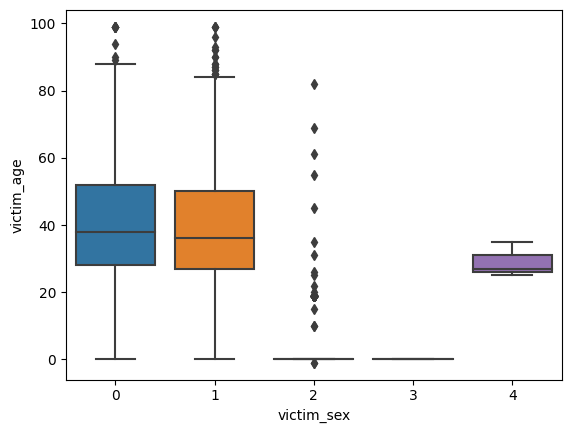

In [252]:
sns.boxplot(x='victim_sex', y='victim_age', data=df)


boxplot with hue 

<Axes: xlabel='victim_sex', ylabel='victim_age'>

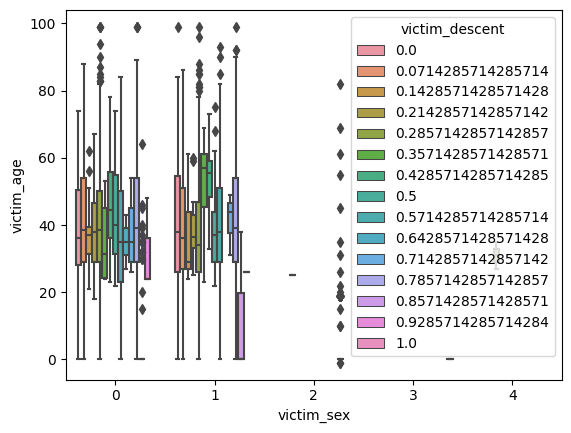

In [253]:
sns.boxplot(x='victim_sex', y='victim_age', hue='victim_descent', data=df)


Seaborn Scatterplot

<Axes: xlabel='victim_sex', ylabel='victim_age'>

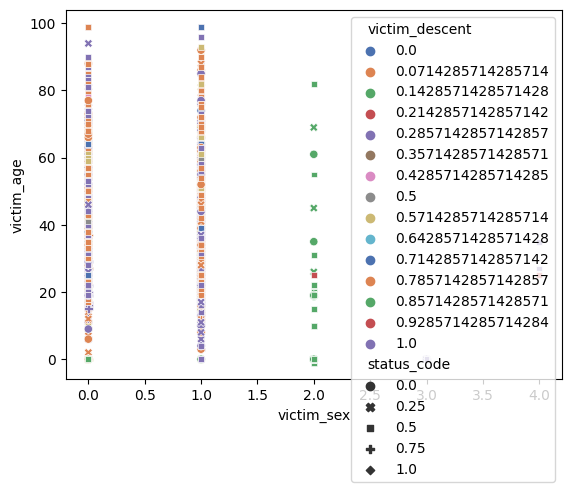

In [254]:
#seaborn.histplot
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.scatterplot(data=df,
                x='victim_sex',
                y='victim_age',
                hue='victim_descent',
                style='status_code',
                palette='deep'
)
                

Seaborn Histplot

<Axes: xlabel='victim_age', ylabel='victim_sex'>

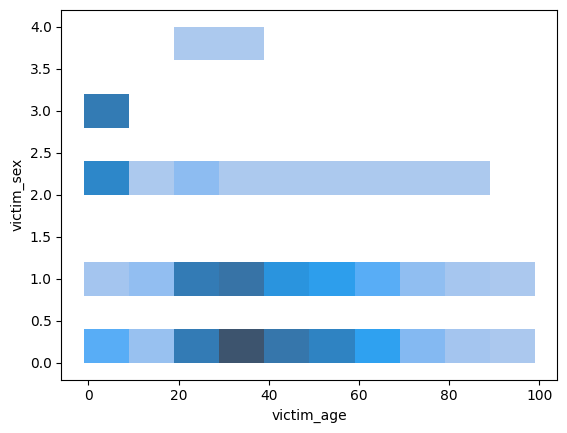

In [255]:
#seaborn.histplot
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df,
                x='victim_age',
                y= 'victim_sex',
                kde=True,
              bins=10
)

In [256]:
df = df[df['victim_age'] >=1]

print(df['victim_age'].describe())



count    8106.000000
mean       40.380459
std        15.500217
min         2.000000
25%        28.000000
50%        38.000000
75%        51.000000
max        99.000000
Name: victim_age, dtype: float64


Step 7: Function to handle Outliers


In [257]:
# from scipy import stats

# # calculate z-scores for victim_age column
# z_scores = stats.zscore(df['victim_age'])

# # replace values that are more than 3 standard deviations away from the mean with the mean value
# df.loc[abs(z_scores) > 3, 'victim_age'] = df['victim_age'].mean()


Feature: victim_age, Lower Bound: -6.5, Upper Bound: 85.5


<Axes: xlabel='victim_sex', ylabel='victim_age'>

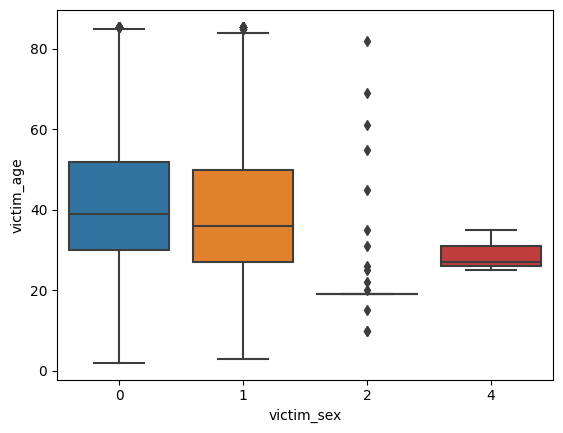

In [258]:
# # Step 7: create an outlier function to detect and replace outliers with flooring and capping technique

def replaceOutliers(dataframe, feature):
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    
    print("Feature: {0}, Lower Bound: {1}, Upper Bound: {2}".format(feature, lowerBound, upperBound))
    
    # capping technique - replacing all higher values with upper bound
    dataframe.loc[dataframe[feature] > upperBound, feature] = upperBound
    
    # flooring technique - replacing all lower values with lower bound
    dataframe.loc[dataframe[feature] < lowerBound, feature] = lowerBound
    
    return dataframe
   
   

# call the function to replace outliers in victim_age column
df = replaceOutliers(df, 'victim_age')

# draw boxplot again to check if outliers are handled
sns.boxplot(x='victim_sex', y='victim_age', data=df)

#lower bound is incorrect here i don't know why but if you check csv file, you can see that it is correct.



exporting to double check

In [259]:
df.to_csv('Outliers_victim_age_FixedData2.csv', index=False)


Seaborn
Joint Plot 

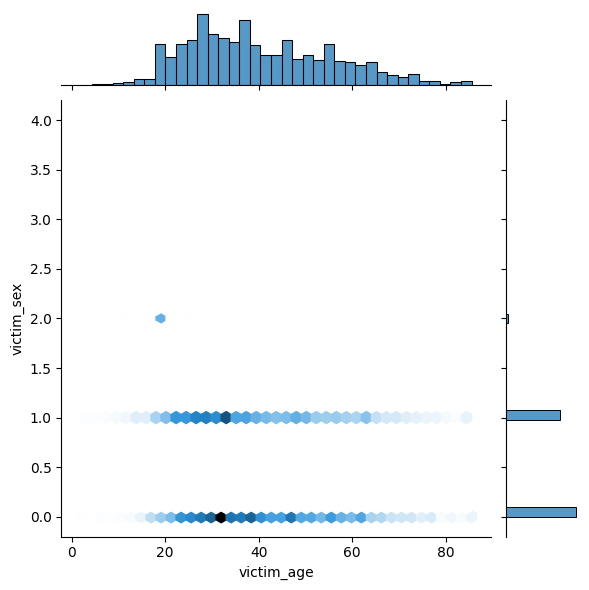

In [260]:
sns.jointplot(data=df, x='victim_age', y='victim_sex', hue=None, kind='hex', )


lab5 corr 


In [261]:
df=pd.read_csv("Outliers_victim_age_FixedData2.csv")


In [262]:
df.describe()


,case_number,time_occurred,area_name,reporting_district,part_type,crime_code,crime_code_description,victim_descent,premise_code,premise_description,...,latitude,longitude,reported_year,reported_month,reported_day,occurred_year,occurred_month,occurred_day,victim_age,victim_sex
count,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,...,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.0,8106.000000,8106.000000,8106.000000,8106.000000
mean,0.901519,0.576270,0.295540,0.303877,0.315199,0.402387,0.592101,0.434431,0.191650,0.710030,...,0.990924,0.003902,0.024488,0.317711,0.484982,0.0,0.318081,0.471696,40.355354,0.464101
std,0.017486,0.276376,0.266255,0.253953,0.464624,0.235406,0.325160,0.280164,0.248710,0.211957,...,0.033192,0.033221,0.135308,0.346916,0.302230,0.0,0.346719,0.304294,15.418561,0.539387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000
25%,0.897054,0.393978,0.100000,0.103053,0.000000,0.261229,0.153061,0.285714,0.000000,0.620112,...,0.991313,0.002355,0.000000,0.000000,0.200000,0.0,0.000000,0.200000,28.000000,0.000000
50%,0.898056,0.614504,0.200000,0.221851,0.000000,0.261229,0.795918,0.285714,0.008046,0.810056,...,0.992025,0.003041,0.000000,0.181818,0.500000,0.0,0.181818,0.466667,38.000000,0.000000
75%,0.900830,0.805344,0.450000,0.448473,1.000000,0.607565,0.795918,0.785714,0.459770,0.854749,...,0.993369,0.003362,0.000000,0.636364,0.766667,0.0,0.636364,0.733333,51.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.928571,1.000000,0.994413,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,85.500000,4.000000


In [263]:
df.corr()


,case_number,time_occurred,area_name,reporting_district,part_type,crime_code,crime_code_description,victim_descent,premise_code,premise_description,...,latitude,longitude,reported_year,reported_month,reported_day,occurred_year,occurred_month,occurred_day,victim_age,victim_sex
case_number,1.000000,-0.044807,0.266907,0.267119,0.051915,-0.043914,0.100423,0.032183,0.069127,-0.036336,...,-0.016396,0.022732,0.763824,0.110856,0.009501,NaN,0.212781,-0.002412,-0.001342,0.009149
time_occurred,-0.044807,1.000000,0.014297,0.013884,-0.045254,-0.016469,0.003553,-0.001810,-0.053475,0.023242,...,-0.008151,0.007698,-0.056785,0.006722,0.013100,NaN,0.005699,0.038681,-0.025360,0.021543
area_name,0.266907,0.014297,1.000000,0.998760,-0.227801,-0.227274,0.291065,0.160210,-0.146973,0.007822,...,0.027215,-0.005891,0.139849,0.418459,0.014508,NaN,0.426545,0.005579,0.083398,-0.064066
reporting_district,0.267119,0.013884,0.998760,1.000000,-0.228023,-0.227621,0.289058,0.158374,-0.147500,0.006278,...,0.026366,-0.005282,0.140969,0.416448,0.014365,NaN,0.424846,0.005259,0.082833,-0.063434
part_type,0.051915,-0.045254,-0.227801,-0.228023,1.000000,0.810463,-0.158636,-0.113646,0.291304,0.030393,...,-0.012416,0.004524,0.136266,-0.158120,-0.018273,NaN,-0.166872,-0.036317,-0.026565,0.127128
crime_code,-0.043914,-0.016469,-0.227274,-0.227621,0.810463,1.000000,-0.086431,-0.085118,0.235129,0.018220,...,-0.014969,0.006948,0.005811,-0.171367,-0.023683,NaN,-0.180078,-0.029765,-0.036537,0.124799
crime_code_description,0.100423,0.003553,0.291065,0.289058,-0.158636,-0.086431,1.000000,0.104110,-0.123864,0.031884,...,0.001760,0.000891,0.049229,0.195823,0.033380,NaN,0.201506,0.024674,0.060074,0.008424
victim_descent,0.032183,-0.001810,0.160210,0.158374,-0.113646,-0.085118,0.104110,1.000000,-0.048660,-0.020987,...,0.008185,-0.003096,-0.001345,0.151260,0.019639,NaN,0.152957,0.017538,0.042714,0.036587
premise_code,0.069127,-0.053475,-0.146973,-0.147500,0.291304,0.235129,-0.123864,-0.048660,1.000000,-0.365779,...,-0.017162,0.009206,0.130282,-0.080733,-0.017205,NaN,-0.084491,-0.041875,-0.036172,0.121617
premise_description,-0.036336,0.023242,0.007822,0.006278,0.030393,0.018220,0.031884,-0.020987,-0.365779,1.000000,...,0.000243,-0.000611,-0.049051,0.030405,0.012768,NaN,0.028467,0.017742,0.037849,-0.049666


Step 6 & 7: Verify and Drop single 
value features


In [264]:
# Step 6: Verify features which have just one value/needs special treatment
df['occurred_year'].describe()
# Step 7: Drop features which have just one value in this case
df = df.drop(['occurred_year'], axis=1)


Step 5: View the Correlation Matrix


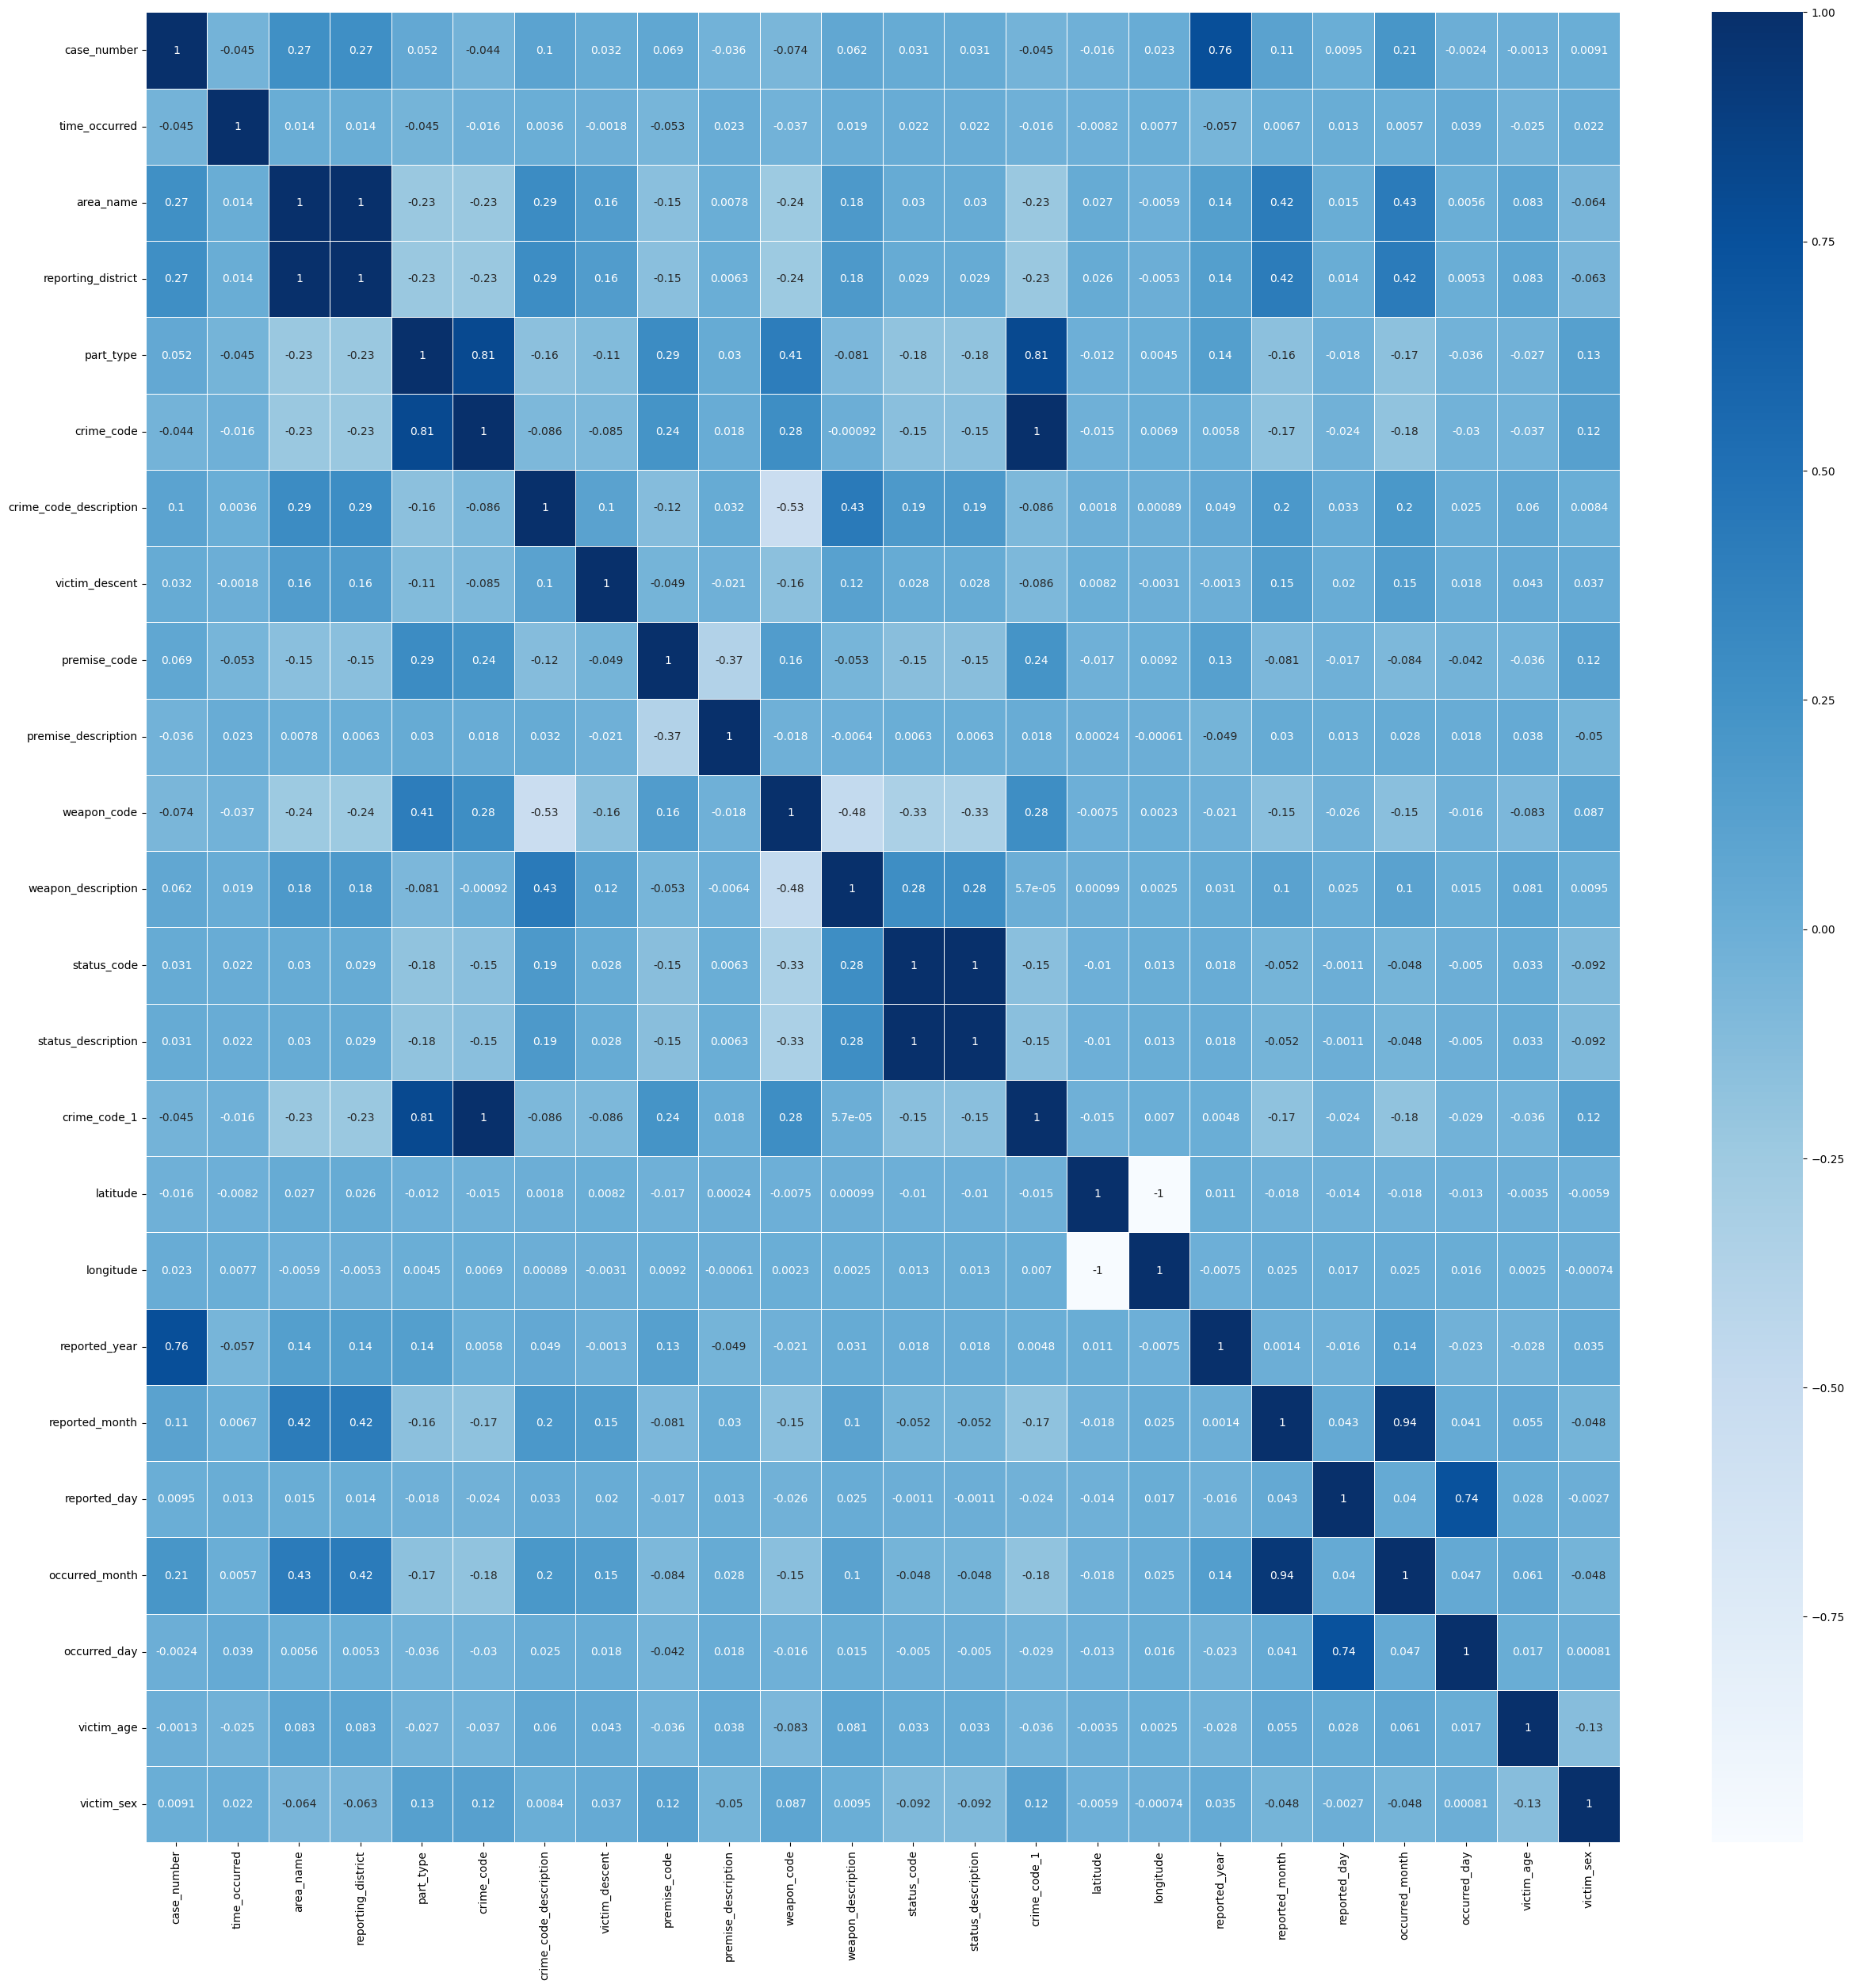

In [265]:
# Step 5: View the above matrix results in a heatmap for better visualization
# seaborn.heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(30,30))
cor_df = df.corr()
sns.heatmap(data=cor_df,
annot=True,
linewidths=0.5,
cmap='Blues') # Greens, BuPu, YlGnBu, etc.
plt.show()

Step 8: Define Function for Identifying 
Correlated features

In [266]:

# Step 8: Create a function to identify all the strongly correlated features for deletion
def identifyCorrelations(dataframe, maxCorrelation):
    # a set to hold strongly correlated features for deletion
    corrFeatures = set()
    # a dataframe of feature correlations
    dfCorrelation = dataframe.corr()
    # loop through all the columns
    for column in range(len(dfCorrelation.columns)):
        # loop through all the rows in the column
        for row in range(column):
            # if the value is greater than maximum correlation
            if abs(dfCorrelation.iloc[column, row]) > maxCorrelation:
                # record the column as its strongly correlated
                corrFeatures.add(dfCorrelation.columns[column])
    # return list of strongly correlated columns set
    return corrFeatures



Step 9 & 10: Call Function & Drop 
Features

In [267]:
# Step 9: Make a call to the above function to identify features strongly correlated with more than certain perctage
corrFeatures = identifyCorrelations(df, 0.80) # greater than 80%
# view the list of features
print("Deleted features:", corrFeatures)
# Step 10: Drop the correlated feature/s
df = df.drop(columns=corrFeatures, axis=1)
# Confirm the changes are applied and correct
df.describe()
# # You may export the new data into an Excel spreadsheet (best practice)
df.to_csv('CoorelationFixedData.csv', index=False)


Deleted features: {'status_description', 'crime_code_1', 'occurred_month', 'crime_code', 'reporting_district', 'longitude'}


In [268]:
df.describe

<bound method NDFrame.describe of       case_number  time_occurred  area_name  part_type  \
0        0.000000       0.945293       0.10        1.0   
1        0.848880       0.139525       0.00        1.0   
2        0.855492       0.733249       0.70        1.0   
3        0.857474       0.175573       0.90        1.0   
4        0.896091       0.012299       0.00        0.0   
...           ...            ...        ...        ...   
8101     0.902789       0.805344       0.70        0.0   
8102     0.902316       0.890161       0.65        0.0   
8103     0.899440       0.766327       0.35        1.0   
8104     0.897088       0.692960       0.10        0.0   
8105     0.899456       0.521204       0.35        0.0   

      crime_code_description  victim_descent  premise_code  \
0                   0.040816        0.071429      0.459770   
1                   0.040816        0.285714      0.001149   
2                   0.948980        0.785714      0.460920   
3                   0

lab part 2 -----------------------Dimensionality Reduction 
using Feature Selection


In [269]:
df=pd.read_csv("CoorelationFixedData.csv")
df.describe()

,case_number,time_occurred,area_name,part_type,crime_code_description,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status_code,latitude,reported_year,reported_month,reported_day,occurred_day,victim_age,victim_sex
count,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000
mean,0.901519,0.576270,0.295540,0.315199,0.592101,0.434431,0.191650,0.710030,0.188695,0.936203,0.451178,0.990924,0.024488,0.317711,0.484982,0.471696,40.355354,0.464101
std,0.017486,0.276376,0.266255,0.464624,0.325160,0.280164,0.248710,0.211957,0.331614,0.149094,0.132766,0.033192,0.135308,0.346916,0.302230,0.304294,15.418561,0.539387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.897054,0.393978,0.100000,0.000000,0.153061,0.285714,0.000000,0.620112,0.000000,0.940000,0.500000,0.991313,0.000000,0.000000,0.200000,0.200000,28.000000,0.000000
50%,0.898056,0.614504,0.200000,0.000000,0.795918,0.285714,0.008046,0.810056,0.000000,1.000000,0.500000,0.992025,0.000000,0.181818,0.500000,0.466667,38.000000,0.000000
75%,0.900830,0.805344,0.450000,1.000000,0.795918,0.785714,0.459770,0.854749,0.180000,1.000000,0.500000,0.993369,0.000000,0.636364,0.766667,0.733333,51.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.928571,1.000000,0.994413,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.500000,4.000000


splitting the data 

In [270]:
# # split the dataset based on dependent (target class) and 
x = df.drop('victim_sex', axis=1)
y = df['victim_sex']
# Print the shape of x and y
print("x shape:", x.shape)
print("y shape:", y.shape)

# Print the first few rows of x and y
print("\nFirst few rows of x:")
print(x.head())
print("\nFirst few rows of y:")
print(y.head())




x shape: (8106, 17)
y shape: (8106,)

First few rows of x:
   case_number  time_occurred  area_name  part_type  crime_code_description  \
0     0.000000       0.945293        0.1        1.0                0.040816   
1     0.848880       0.139525        0.0        1.0                0.040816   
2     0.855492       0.733249        0.7        1.0                0.948980   
3     0.857474       0.175573        0.9        1.0                0.938776   
4     0.896091       0.012299        0.0        0.0                0.653061   

   victim_descent  premise_code  premise_description  weapon_code  \
0        0.071429      0.459770             0.815642         0.78   
1        0.285714      0.001149             0.810056         0.80   
2        0.785714      0.460920             0.620112         0.00   
3        0.857143      0.354023             0.089385         0.00   
4        0.285714      0.728736             0.642458         0.80   

   weapon_description  status_code  latitude  repor

In [271]:
# Step 5: Split the data into training and testing sets
# Warning: Always split the data into training and testing sets and apply needed data preprocessing seperately to avoid information leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x,
y,
# test_size=0.2, 80% training, 20% testing set
random_state=0
)
X_train.shape, X_test.shape

((6079, 17), (2027, 17))

Step 6: Apply Feature Selection


In [272]:
# Step 6: Apply Feature selection using Mutual Information Classification•
# Import necessary libraries
from sklearn.feature_selection import mutual_info_classif

# Apply Feature selection using Mutual Information Classification
mutualInfoArray = mutual_info_classif(X_train.fillna(0), y_train)

# List all the scores in an array
mutualInfoArray


array([0.04188232, 0.        , 0.02884916, 0.0018067 , 0.06886785,
       0.0975972 , 0.03450939, 0.02806364, 0.        , 0.00486784,
       0.00925072, 0.03941515, 0.00040662, 0.00590123, 0.00446761,
       0.        , 0.07238479])

In [273]:
# Step 7: Display mutual information (highest to lowerst) along with feature names
mutualInfo1 = pd.Series(mutualInfoArray)
mutualInfo1.index = X_train.columns
mutualInfo1.sort_values(ascending=False)


victim_descent            0.097597
victim_age                0.072385
crime_code_description    0.068868
case_number               0.041882
latitude                  0.039415
premise_code              0.034509
area_name                 0.028849
premise_description       0.028064
status_code               0.009251
reported_month            0.005901
weapon_description        0.004868
reported_day              0.004468
part_type                 0.001807
reported_year             0.000407
time_occurred             0.000000
occurred_day              0.000000
weapon_code               0.000000
dtype: float64

These are the top (highest to lowest) features that give lot of informatino on our target variable


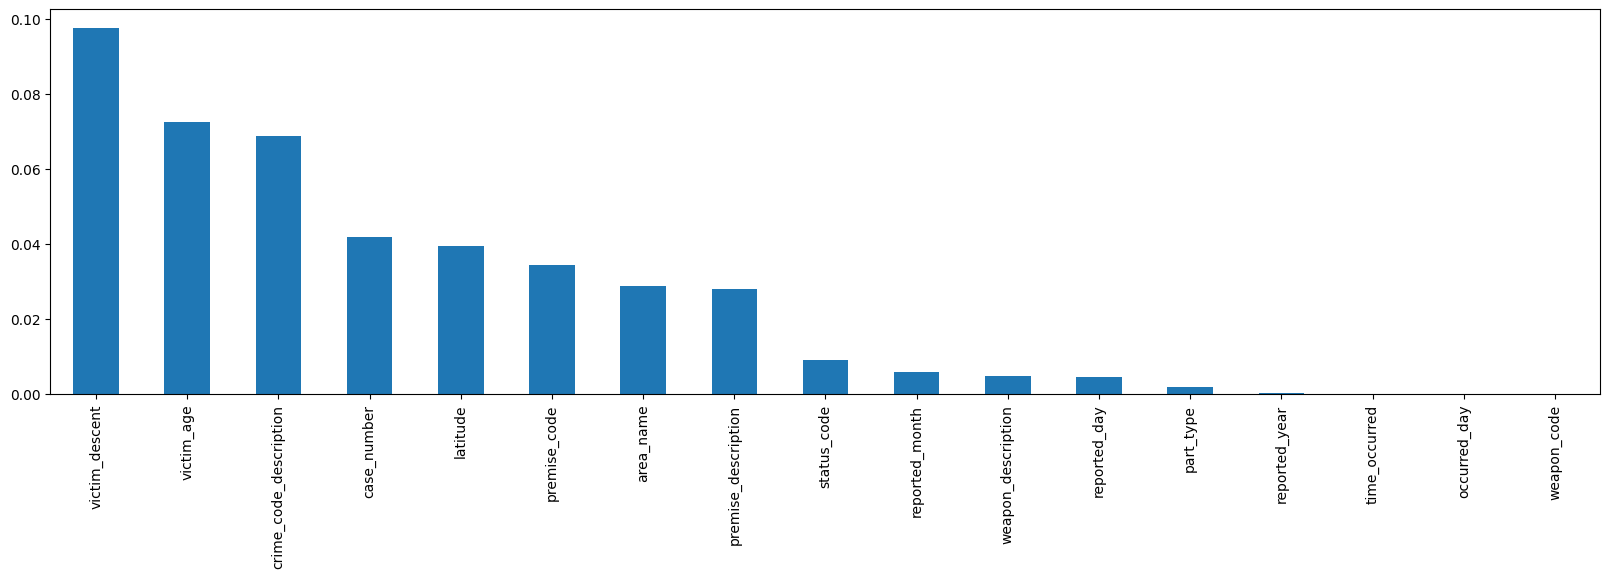

In [274]:
# Step 8: Display mutual information in a graphical representation
mutualInfo1.sort_values(ascending=False).plot.bar(figsize=(20,5))
print('These are the top (highest to lowest) features that give lot of informatino on our target variable')


Step 9: View Mutual Info List


In [275]:
# Step 9: Select the top n features which are important in determining target class (dependent variable) 
# sklearn.feature_selection.SelectKBest
# https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# IMPORTANT: There are different feature selection options. SelectKBest is one of them.
# https://scikit-learn.org/stable/modules/classes.html#modulesklearn.feature_selection
from sklearn.feature_selection import SelectKBest
selectTopNFeatures = SelectKBest(mutual_info_classif, k=6)
selectTopNFeatures.fit(X_train, y_train)
# hold the most important features
cols = X_train.columns[selectTopNFeatures.get_support()]
cols


Index(['case_number', 'area_name', 'crime_code_description', 'victim_descent',
       'latitude', 'victim_age'],
      dtype='object')

In [276]:
# Step 10: Keep the most important features and delete the rest from both test and training sets
X_train = X_train.loc[:, cols]
X_test = X_test.loc[:, cols]
# make sure only the most important features are retained
X_train, X_test

(      case_number  area_name  crime_code_description  victim_descent  \
 7019     0.896154       0.00                0.795918        0.071429   
 2865     0.897087       0.10                0.020408        0.785714   
 3449     0.897530       0.15                0.948980        0.285714   
 1421     0.896583       0.05                0.122449        0.285714   
 7565     0.896600       0.05                0.285714        0.285714   
 ...           ...        ...                     ...             ...   
 4931     0.902262       0.65                0.795918        0.285714   
 3264     0.897104       0.10                0.989796        0.785714   
 1653     0.896586       0.05                0.806122        0.285714   
 2607     0.897059       0.10                0.867347        0.071429   
 2732     0.898981       0.30                0.826531        0.785714   
 
       latitude  victim_age  
 7019  0.991519        29.0  
 2865  0.991053        26.0  
 3449  0.992839        82.0  
 1

In [277]:
unique, counts = np.unique(y_train, return_counts=True)
minority_class_count = min(counts)
print("Minority class count: ", minority_class_count)

Minority class count:  3


In [278]:
# 13. Apply SMOTE for sampling. You will need to install pip install implearn
# https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

from imblearn.over_sampling import SMOTE 

# sampling_stragety means the number of samples to be generated
# k_neighbors means the number of neighbors to be used
# random_state means the random state to be used 
# sampling_strategy = 0.3, k_neighbors = 5, random_state = 200
sm = SMOTE(k_neighbors=2) 
X_train, y_train = sm.fit_resample(X_train, y_train) 


# Print the oversampling results
print("\n\t Post OverSampling, the shape of  X_train: {}".format(X_train.shape)) 
print("\t Post OverSampling, the shape of y_train: {}".format(X_train.shape)) 
  
print("Post OverSampling, label count '1': {}".format(sum(y_train == 1))) 
print("Post OverSampling, label count '0': {}".format(sum(y_train == 0)))


	 Post OverSampling, the shape of  X_train: (13608, 6)
	 Post OverSampling, the shape of y_train: (13608, 6)
Post OverSampling, label count '1': 3402
Post OverSampling, label count '0': 3402


In [279]:
# Perform K-Fold Cross-Validation Statistics ('accuracy', 'precision', 'recall', 'f1')
# https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

from sklearn.model_selection import cross_validate

def Print_Cross_Validation_Statistics(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
     
     #  return results as a dictionary
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [280]:
# Plot grouped Bar Chart for both training and validation data
def Plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [281]:
# Plot confusion matrix function
import itertools

# Draw a confusion matrix using Matplotlib
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
def Plot_Confusion_Matrix(cm,
                          url_types,
                          title,
                          cmap=plt.cm):

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

In [282]:
# print individual model statistics
def Print_model_stats(y_test, y_pred):
    # Calucate all the performance measurements
    print('Precision Score: %.3f' % precision_score(y_test, y_pred))
    print('Accuracy Score: %.3f' % accuracy_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))

In [283]:
# Plot AUC ROC curve function
from sklearn import metrics

def Plot_AUC_ROC_Curve(y_test,X_test,model):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.25, 1.25])
    plt.ylim([-0.25, 1.25])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [284]:
# Feature importance function
def Feature_Importance(model,color_name):
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(8,8))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color=color_name, align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.xticks(rotation=45)
    plt.show()

**Step 5: Train the data using classification models**
*   Logistic regression, 
*   Support Vector Machine
*   K-Nearest Neighbor, 
*   Naive Bayes, 
*   Decision Tree

In [285]:
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression(random_state=0)
LRClassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [286]:
# Predict test set data and compare results from the actual test set
lr_y_pred = LRClassifier.predict(X_test)
# verify predicted values with the test set actual values
print(np.concatenate((lr_y_pred.reshape(len(lr_y_pred), 1), 
                      y_test.values.reshape(len(y_test), 1)), 1))

[[4 1]
 [0 1]
 [2 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [287]:
from sklearn.metrics import confusion_matrix

# Create a Confusion Matrix for measuring the performance of the model
LGconfMatrix = confusion_matrix(y_test, lr_y_pred)
print(LGconfMatrix)


[[489 321  76 218]
 [346 241  69 226]
 [  2   1  38   0]
 [  0   0   0   0]]


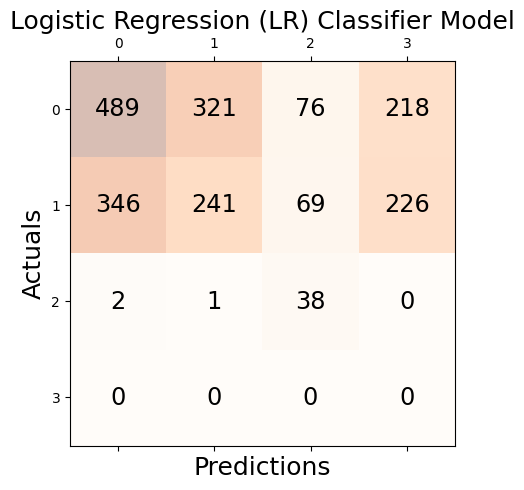

In [288]:
# Plot confusion matris
Plot_Confusion_Matrix(LGconfMatrix, 
                      np.unique(y_test),
                      title="Logistic Regression (LR) Classifier Model"
                      )

Training Accuracy scores: [0.66516627 0.66975932 0.66534999 0.6695141  0.66547258]
Mean Training Accuracy: 66.70524529362234
Training Precision scores: [nan nan nan nan nan]
Mean Training Precision: nan
Training Recall scores: [nan nan nan nan nan]
Mean Training Recall: nan
Training F1 scores: [nan nan nan nan nan]
Mean Training F1 Score: nan
Validation Accuracy scores: [0.66605437 0.67229978 0.65980896 0.66078648 0.66482911]
Mean Validation Accuracy: 66.47557395725573
Validation Precision scores: [nan nan nan nan nan]
Mean Validation Precision: nan
Validation Recall scores: [nan nan nan nan nan]
Mean Validation Recall: nan
Validation F1 scores: [nan nan nan nan nan]
Mean Validation F1 Score: nan


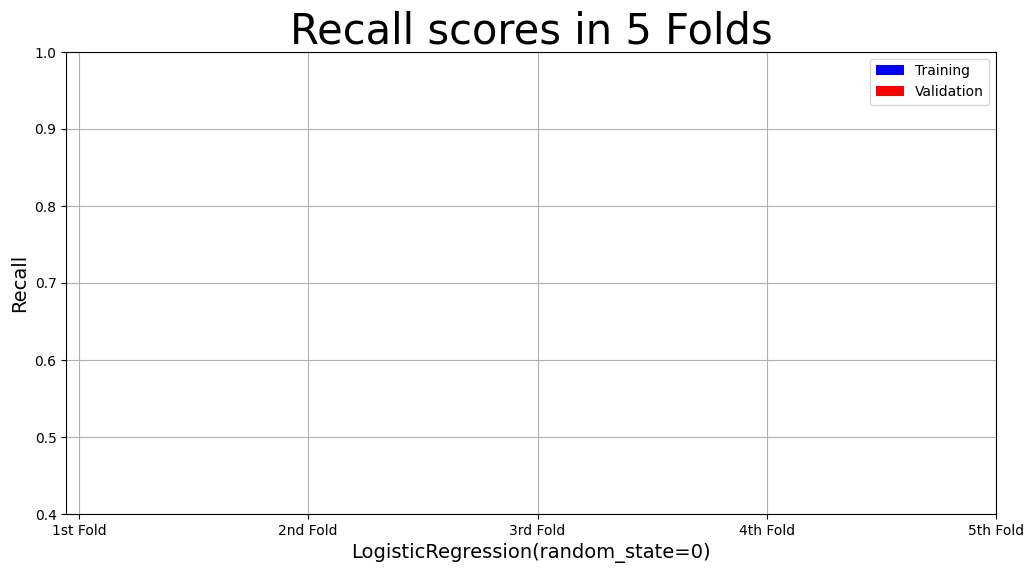

In [289]:
# perform n-cross-validation and print results
LRResults = Print_Cross_Validation_Statistics(LRClassifier, 
                                              X_train, 
                                              y_train, 
                                              5)

# print dictionary results line by line(DTResults)
for key in LRResults:
    print (f"{key}: {LRResults[key]}")
    
# plot the results
Plot_result(LRClassifier,
            "Recall",
            "Recall scores in 5 Folds",
            LRResults["Training Recall scores"],
            LRResults["Validation Recall scores"])

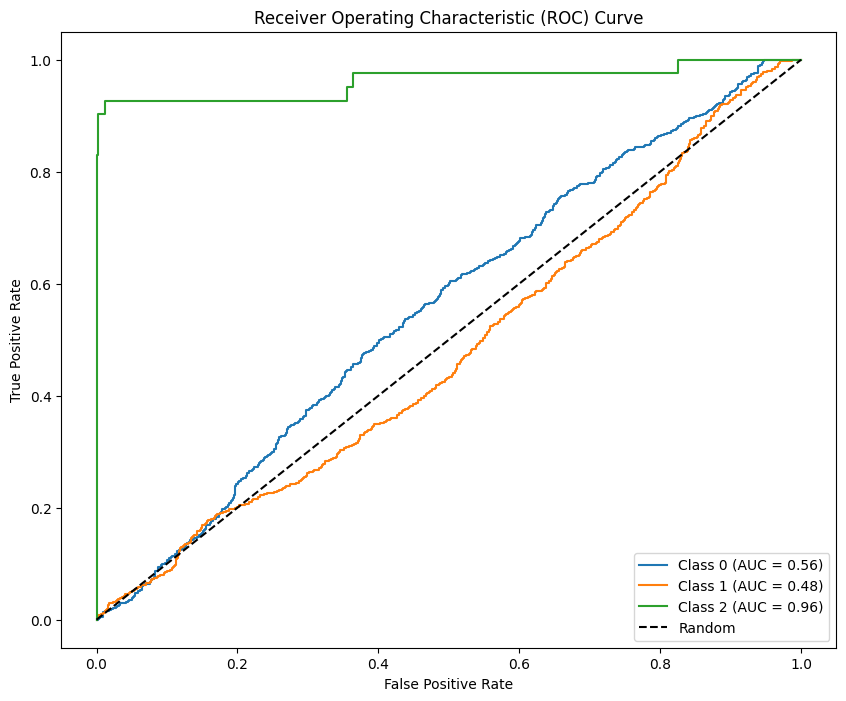

In [290]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_auc_roc_curve(y_test, X_test, model):
    # Binarize the target variable
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Compute predicted probabilities
    y_score = model.predict_proba(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the function with your variables
plot_auc_roc_curve(y_test, X_test, LRClassifier)


In [291]:
# display feature importance for logistic regression
# logistic_model.fit(X,Y)
# importance = logistic_model.coef_[0]
# #importance is a list so you can plot it. 
# feat_importances = pd.Series(importance)
# feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*--------------------------------Support Vector Machine--------------------------------*

In [292]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an SVM classifier object with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [293]:
import numpy as np

# Use the correct variable name: svm_classifier
svm_y_pred = svm_classifier.predict(X_test)

# Verify predicted values with the test set actual values
# Assuming y_test is a NumPy array, remove .values
print(np.concatenate((svm_y_pred.reshape(len(svm_y_pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [294]:
SVMconfMatrix = confusion_matrix(y_test, svm_y_pred)
print(SVMconfMatrix)
# accuracy_score(y_test, svm_y_pred)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


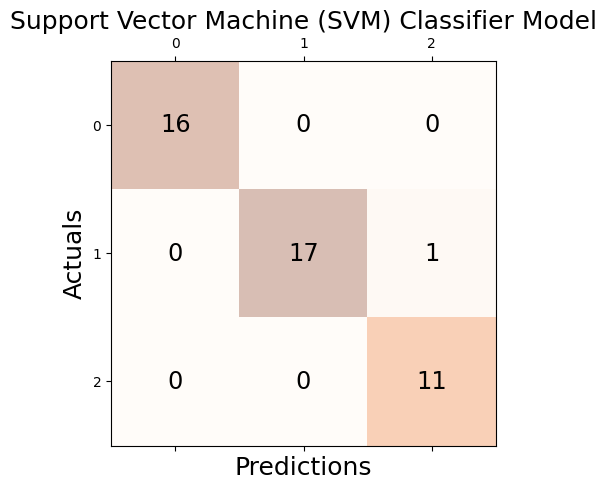

In [295]:
# Plot confusion matris
Plot_Confusion_Matrix(SVMconfMatrix, 
                      np.unique(y_test),
                      title="Support Vector Machine (SVM) Classifier Model"
                      )

Training Accuracy scores: [0.97619048 0.96428571 0.95238095 0.97619048 0.96428571]
Mean Training Accuracy: 96.66666666666666
Training Precision scores: [nan nan nan nan nan]
Mean Training Precision: nan
Training Recall scores: [nan nan nan nan nan]
Mean Training Recall: nan
Training F1 scores: [nan nan nan nan nan]
Mean Training F1 Score: nan
Validation Accuracy scores: [0.9047619  1.         1.         0.9047619  0.95238095]
Mean Validation Accuracy: 95.23809523809523
Validation Precision scores: [nan nan nan nan nan]
Mean Validation Precision: nan
Validation Recall scores: [nan nan nan nan nan]
Mean Validation Recall: nan
Validation F1 scores: [nan nan nan nan nan]
Mean Validation F1 Score: nan


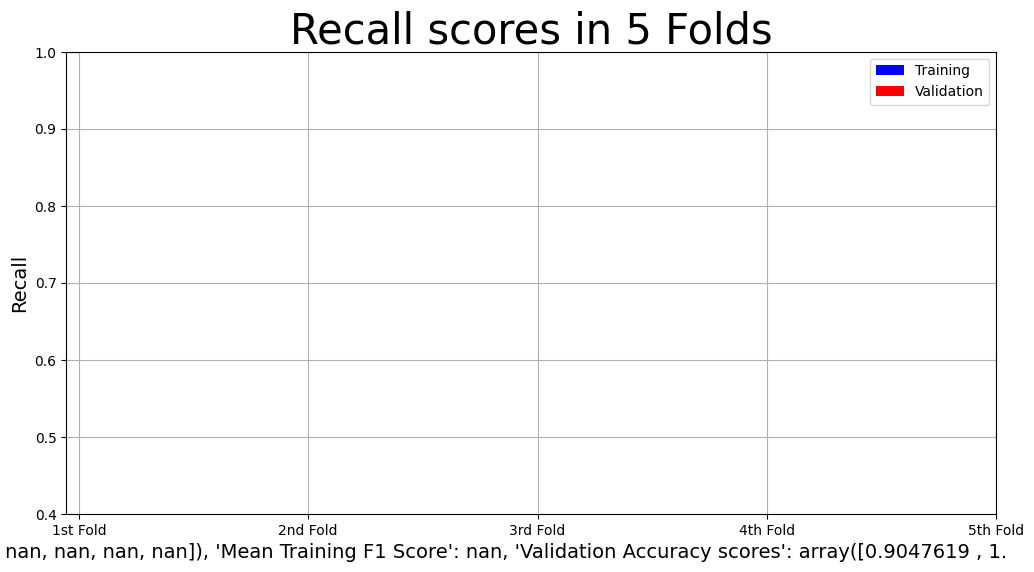

In [296]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
SVMClassifier = svm.SVC()

# perform n-cross-validation and print results
SVMResults = Print_Cross_Validation_Statistics(SVMClassifier, 
                                              X_train, 
                                              y_train, 
                                           5)

# print dictionary results line by line(DTResults)
for key in SVMResults:
    print (f"{key}: {SVMResults[key]}")
    
# plot the results
Plot_result(SVMResults,
            "Recall",
            "Recall scores in 5 Folds",
            SVMResults["Training Recall scores"],
            SVMResults["Validation Recall scores"])

In [297]:
#Plot the ROC Curve
# SVMClassifier.predict_proba=True
# SVMauc = Plot_AUC_ROC_Curve(y_test,X_test,SVMClassifier)

*-------------------------------- K Nearest Neighbors --------------------------------*

In [298]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors = 5,
                                      metric = "minkowski",
                                      p = 2)
KNNClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [299]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object with n_neighbors=5 (default)
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predict the test set labels
knn_y_pred = knn_classifier.predict(X_test)

# Verify predicted values with the test set actual values
# Assuming y_test is a NumPy array, remove .values
print(np.concatenate((knn_y_pred.reshape(len(knn_y_pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [300]:
from sklearn.metrics import confusion_matrix, accuracy_score

KNNconfMatrix = confusion_matrix(y_test, knn_y_pred)
print(KNNconfMatrix)

KNNaccuracy = accuracy_score(y_test, knn_y_pred)
print(KNNaccuracy)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
0.9777777777777777


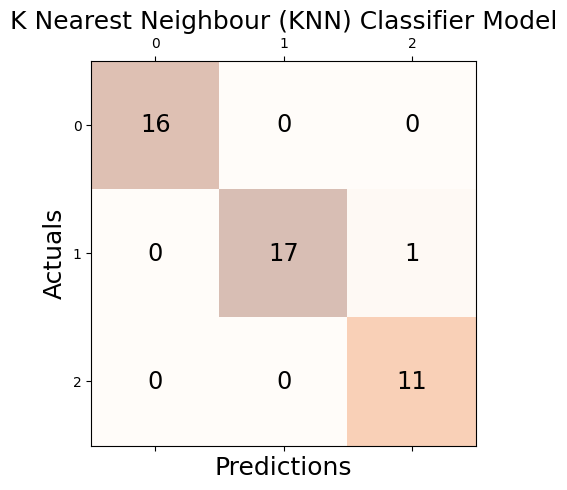

In [301]:
# Plot confusion matris
Plot_Confusion_Matrix(KNNconfMatrix, 
                      np.unique(y_test),
                      title="K Nearest Neighbour (KNN) Classifier Model"
                      )

Training Accuracy scores: [0.97619048 0.96428571 0.96428571 0.97619048 0.95238095]
Mean Training Accuracy: 96.66666666666666
Training Precision scores: [nan nan nan nan nan]
Mean Training Precision: nan
Training Recall scores: [nan nan nan nan nan]
Mean Training Recall: nan
Training F1 scores: [nan nan nan nan nan]
Mean Training F1 Score: nan
Validation Accuracy scores: [0.95238095 1.         1.         0.85714286 1.        ]
Mean Validation Accuracy: 96.1904761904762
Validation Precision scores: [nan nan nan nan nan]
Mean Validation Precision: nan
Validation Recall scores: [nan nan nan nan nan]
Mean Validation Recall: nan
Validation F1 scores: [nan nan nan nan nan]
Mean Validation F1 Score: nan


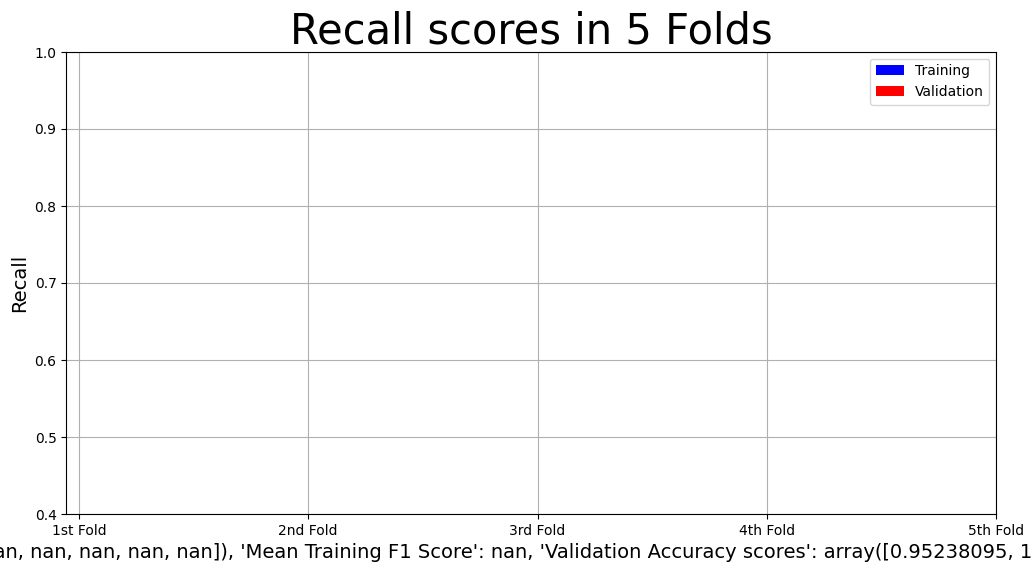

In [302]:
# perform n-cross-validation and print results
KNNResults = Print_Cross_Validation_Statistics(KNNClassifier, 
                                              X_train, 
                                              y_train, 
                                              5)

# print dictionary results line by line(DTResults)
for key in KNNResults:
    print (f"{key}: {KNNResults[key]}")
    
# plot the results
Plot_result(KNNResults,
            "Recall",
            "Recall scores in 5 Folds",
            KNNResults["Training Recall scores"],
            KNNResults["Validation Recall scores"])

*--------------------------------Naive Bayes--------------------------------*

In [303]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [304]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier object
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Predict the test set labels
nb_y_pred = nb_classifier.predict(X_test)

# Verify predicted values with the test set actual values
# Assuming y_test is a NumPy array, remove .values
print(np.concatenate((nb_y_pred.reshape(len(nb_y_pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [305]:
NBconfMatrix = confusion_matrix(y_test, nb_y_pred)
print(NBconfMatrix)
# accuracy_score(y_test, nb_y_pred)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


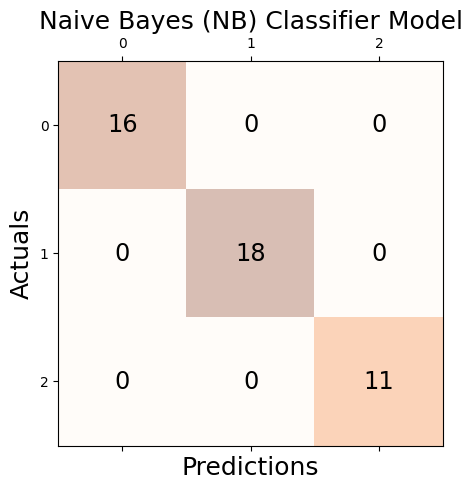

In [306]:
# Plot confusion matris
Plot_Confusion_Matrix(NBconfMatrix, 
                      np.unique(y_test),
                      title="Naive Bayes (NB) Classifier Model"
                      )

Training Accuracy scores: [0.97619048 0.94047619 0.92857143 0.95238095 0.94047619]
Mean Training Accuracy: 94.76190476190476
Training Precision scores: [nan nan nan nan nan]
Mean Training Precision: nan
Training Recall scores: [nan nan nan nan nan]
Mean Training Recall: nan
Training F1 scores: [nan nan nan nan nan]
Mean Training F1 Score: nan
Validation Accuracy scores: [0.85714286 0.95238095 1.         0.95238095 0.95238095]
Mean Validation Accuracy: 94.28571428571428
Validation Precision scores: [nan nan nan nan nan]
Mean Validation Precision: nan
Validation Recall scores: [nan nan nan nan nan]
Mean Validation Recall: nan
Validation F1 scores: [nan nan nan nan nan]
Mean Validation F1 Score: nan


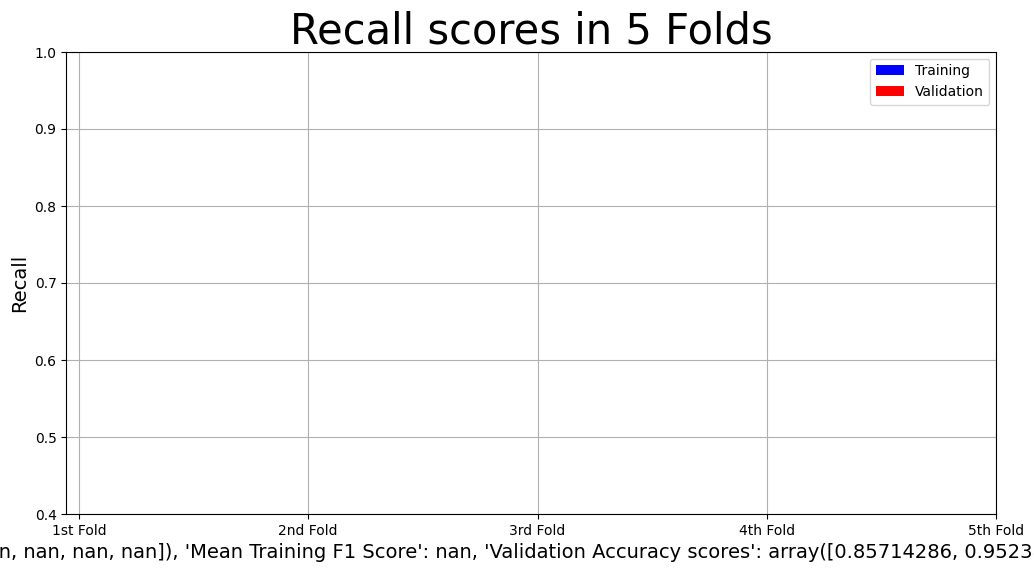

In [307]:
# perform n-cross-validation and print results
NBResults = Print_Cross_Validation_Statistics(NBClassifier, 
                                              X_train, 
                                              y_train, 
                                              5)

# print dictionary results line by line(DTResults)
for key in NBResults:
    print (f"{key}: {NBResults[key]}")
    
# plot the results
Plot_result(NBResults,
            "Recall",
            "Recall scores in 5 Folds",
            NBResults["Training Recall scores"],
            NBResults["Validation Recall scores"])

In [308]:
def Plot_AUC_ROC_Curve(y_test, X_test, model):
    # Calculate the probabilities and predictions
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    
    # Calculate the ROC curve and AUC score
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return roc_auc

In [309]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',
                                      random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [310]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the test set labels
dt_y_pred = dt_classifier.predict(X_test)

# Verify predicted values with the test set actual values
# Assuming y_test is a NumPy array, remove .values
print(np.concatenate((dt_y_pred.reshape(len(dt_y_pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


In [311]:
DTconfMatrix = confusion_matrix(y_test, dt_y_pred)
print(DTconfMatrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


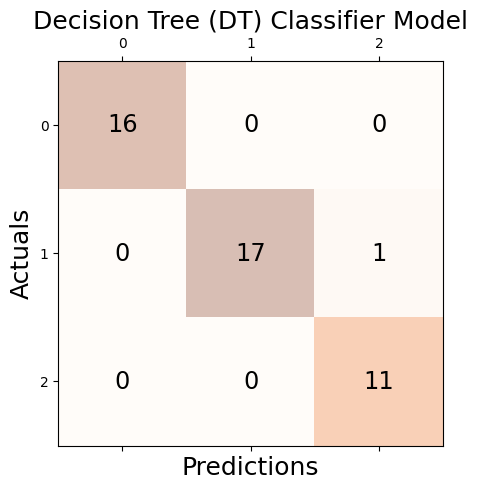

In [312]:
# Plot confusion matris
Plot_Confusion_Matrix(DTconfMatrix, 
                      np.unique(y_test),
                      title="Decision Tree (DT) Classifier Model"
                      )

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy: 100.0
Training Precision scores: [nan nan nan nan nan]
Mean Training Precision: nan
Training Recall scores: [nan nan nan nan nan]
Mean Training Recall: nan
Training F1 scores: [nan nan nan nan nan]
Mean Training F1 Score: nan
Validation Accuracy scores: [0.85714286 1.         1.         0.9047619  0.95238095]
Mean Validation Accuracy: 94.28571428571428
Validation Precision scores: [nan nan nan nan nan]
Mean Validation Precision: nan
Validation Recall scores: [nan nan nan nan nan]
Mean Validation Recall: nan
Validation F1 scores: [nan nan nan nan nan]
Mean Validation F1 Score: nan


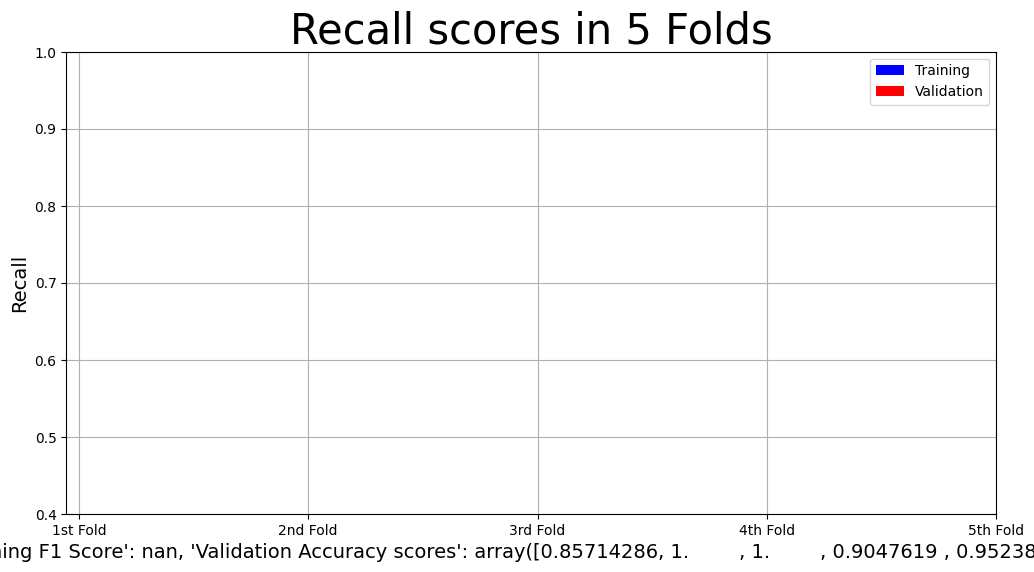

In [313]:
# perform n-cross-validation and print results
DTResults = Print_Cross_Validation_Statistics(DTClassifier, 
                                              X_train, 
                                              y_train, 
                                              5)

# print dictionary results line by line(DTResults)
for key in DTResults:
    print (f"{key}: {DTResults[key]}")
    
# plot the results
Plot_result(DTResults,
            "Recall",
            "Recall scores in 5 Folds",
            DTResults["Training Recall scores"],
            DTResults["Validation Recall scores"])

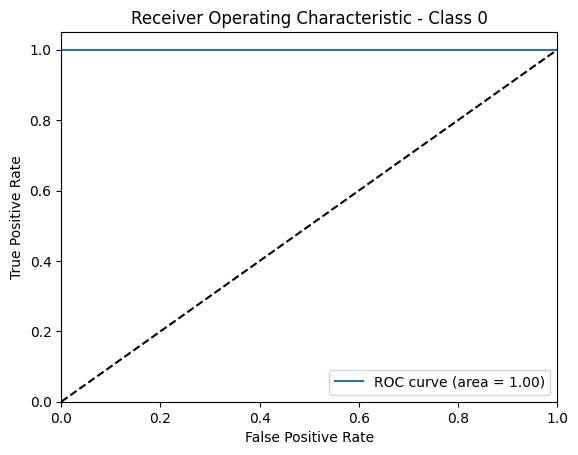

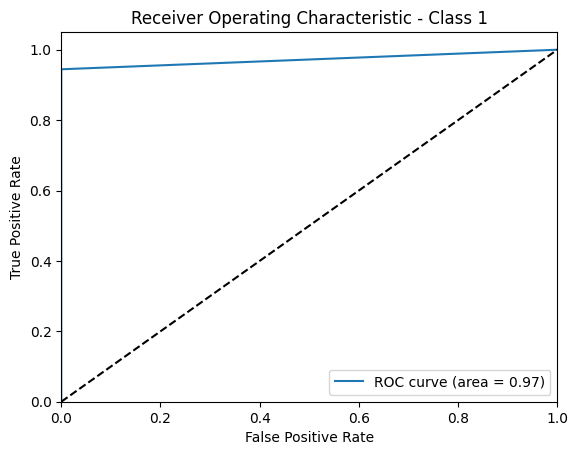

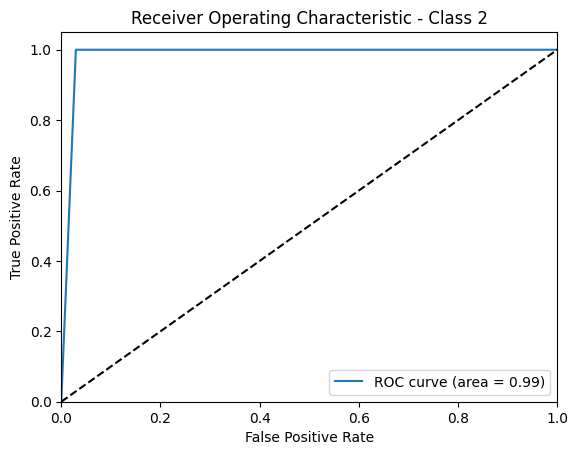

In [314]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_binarized.shape[1]

# Create a OneVsRestClassifier with your base classifier (e.g., DecisionTreeClassifier)
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier())
ovr_classifier.fit(X_train, y_train)

# Predict the probabilities for each class
y_score = ovr_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

**Draw a chart showing all the 5 Classifiers different performance measures**

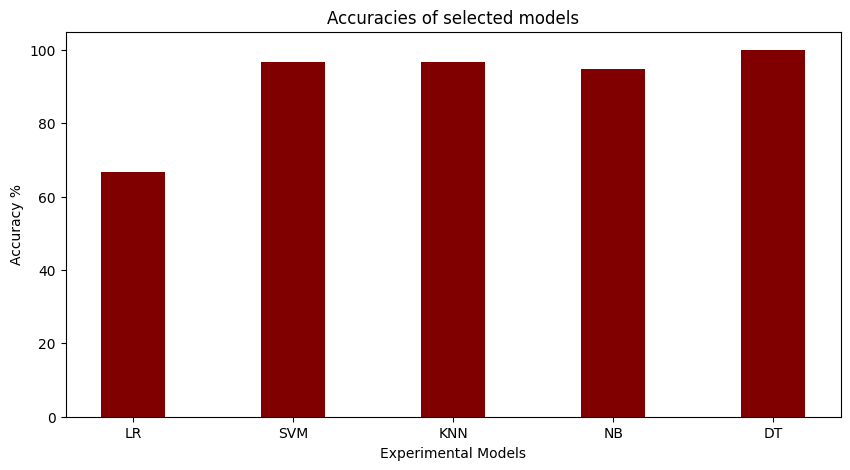

	 Linear Regression Accuracy %: 66.70524529362234
	 Support Vector Machine Accuracy %: 96.66666666666666
	 K Nearest Neighbour Accuracy %: 96.66666666666666
	 Naive Bayes Accuracy %: 94.76190476190476
	 Decision Tree Accuracy %: 100.0


In [315]:
# Precision should ideally be 1 (high) for a good classifier. 
# Recall should ideally be 1 (high) for a good classifier.
# F1 Score becomes 1 only when precision and recall are both 1. 
# F1 score becomes high only when both precision and recall are high.
# The higher the area under the ROC curve (AUC), the better the classifier

LR = LRResults["Mean Training Accuracy"]
SVM = SVMResults["Mean Training Accuracy"]
KNN = KNNResults["Mean Training Accuracy"]
NB = NBResults["Mean Training Accuracy"]
DT = DTResults["Mean Training Accuracy"]

plot_name = ['LR', 'SVM', 'KNN', 'NB', 'DT']
plot_values = [LR, SVM, KNN, NB, DT]

# creating the dataset
data = {'LR':LR, 'SVM':SVM, 'KNN':KNN, 'NB':NB, 'DT':DT}
models = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Experimental Models")
plt.ylabel("Accuracy %")
plt.title("Accuracies of selected models")
plt.show()
# ----------------------------------print valoues --------------------------------
print("\t Linear Regression Accuracy %: {}".format(LR))
print("\t Support Vector Machine Accuracy %: {}".format(SVM))
print("\t K Nearest Neighbour Accuracy %: {}".format(KNN))
print("\t Naive Bayes Accuracy %: {}".format(NB))
print("\t Decision Tree Accuracy %: {}".format(DT)) 

Step 1: Import Libraries

In [316]:
# Data processing 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import metrics


Step 2: Read Data


In [344]:

# # Load data
# iris = datasets.load_iris()
# # Show data information
# iris.keys()

# #dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# # Print feature and target information

# print('The feature names are:', iris['feature_names'])
# print('The target names are:', iris['target_names'])
# print('The target values are:', iris['target'])

import pandas as pd

# Load data from a CSV file
data = pd.read_csv('CoorelationFixedData.csv')

# Show data information
print(data.info())

# Print feature and target information
features = data.columns[:-1]  # assuming the last column is your target
target = data.columns[-1]  # assuming the last column is your target

print('The feature names are:', features)
print('The target name is:', target)
print('The target values are:', data[target].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8106 entries, 0 to 8105
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8106 non-null   float64
 1   time_occurred           8106 non-null   float64
 2   area_name               8106 non-null   float64
 3   part_type               8106 non-null   float64
 4   crime_code_description  8106 non-null   float64
 5   victim_descent          8106 non-null   float64
 6   premise_code            8106 non-null   float64
 7   premise_description     8106 non-null   float64
 8   weapon_code             8106 non-null   float64
 9   weapon_description      8106 non-null   float64
 10  status_code             8106 non-null   float64
 11  latitude                8106 non-null   float64
 12  reported_year           8106 non-null   float64
 13  reported_month          8106 non-null   float64
 14  reported_day            8106 non-null   

Step 3: Kmeans Clustering (Model 1)


In [345]:
# # Kmeans model
# kmeans = KMeans(n_clusters = 3,  random_state = 42)
# # Fit and predict on the data
# y_kmeans = kmeans.fit_predict(X)
# # Save the predictions as a column
# df['y_kmeans']=y_kmeans
# # Check the distribution
# df['y_kmeans'].value_counts()

# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)

# Fit the model on your data
kmeans.fit(df)

# Predict the cluster labels for your data
y_kmeans = kmeans.predict(df)

# Save the predictions as a column
df['y_kmeans'] = y_kmeans

# Check the distribution
df['y_kmeans'].value_counts()


1    3422
2    2802
0    1882
Name: y_kmeans, dtype: int64

Step 4: Decison Tree


In [346]:
# # Parameters
# n_classes = 3
# plot_colors = "bry"
# plot_step = 0.02

# # Load data
# iris = load_iris()

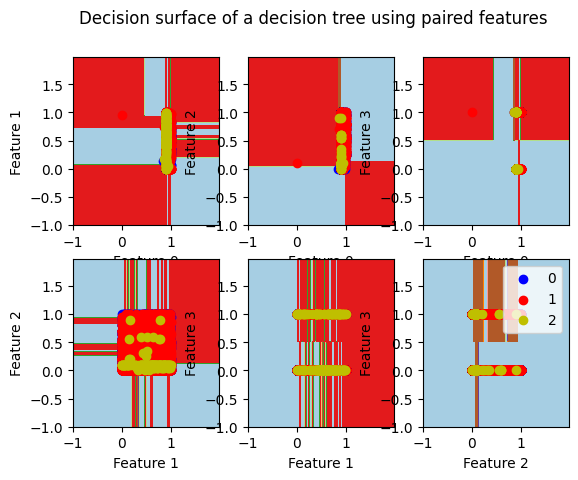

In [353]:
# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                 [1, 2], [1, 3], [2, 3]]):
#     # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

#     # Train
#     clf = DecisionTreeClassifier().fit(X, y)

#     # Plot the decision boundary
#     plt.subplot(2, 3, pairidx + 1)

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])
#     plt.axis("tight")

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
#                     cmap=plt.cm.Paired)

#     plt.axis("tight")

# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.legend()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
X = df.drop('victim_sex', axis=1).values
y = df['victim_sex'].values

# List of feature pairs to consider (adjust as needed)
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

for pairidx, pair in enumerate(feature_pairs):
    # We only take the two corresponding features
    X_pair = X[:, pair]

    # Train
    clf = DecisionTreeClassifier().fit(X_pair, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature ' + str(pair[0]))
    plt.ylabel('Feature ' + str(pair[1]))
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=str(i),
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


Step 5: Ensamble Methods


Step 6: DBSCAN Clustering

Generate sample data


In [354]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750,\
                            centers=centers,\
                            cluster_std=0.4,\
                            random_state=0)

Preprocessing

In [355]:
X = StandardScaler().fit_transform(X)


Compute DBSCAN


In [356]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

Number of clusters in labels, ignoring noise if present.


In [357]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Results


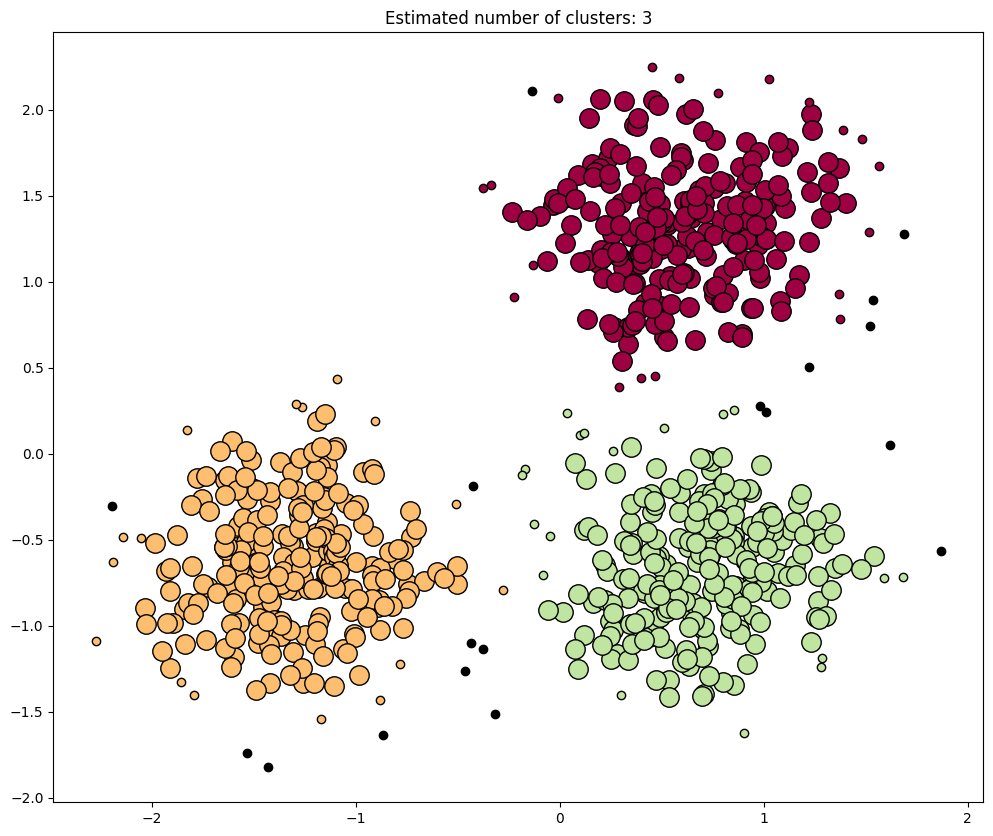

In [358]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
plt.figure(figsize = [12,10])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()